# Proposta: 

O seguinte trabalho tem como objetivo fazer uma análise exploratória e tentativa de estimação dos preços com daddos do air
bnb com os dados do Rio de Janeiro.

Importando as bibliotecas:

In [1]:
import os
import pandas as pd
import numpy as np
import math
from scipy import stats
from scipy.stats import norm
from sklearn.metrics import confusion_matrix, accuracy_score, make_scorer, f1_score, precision_score, recall_score, classification_report
from sklearn.model_selection import RepeatedKFold, cross_val_score, train_test_split, GridSearchCV, KFold, ShuffleSplit
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import scale
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()

from colorama import Fore, Back, Style

Primeiro passo: primeiro fazer uma análise exploratória e tratar os dados que forem precisos:

In [2]:
for dirname, _, filenames in os.walk('C:/Users/Manoel/Documents/GitHub/estadia/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/Manoel/Documents/GitHub/estadia/input\listings_detalhado.csv


In [3]:
dados_ = pd.read_csv('C:/Users/Manoel/Documents/GitHub/estadia/input/listings_detalhado.csv')

In [4]:
dados_

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20201025230850,2020-10-26,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. <br />- Large b...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,https://www.airbnb.com/users/show/68997,...,10.0,10.0,9.0,NaN,t,1,1,0,0,2.04
1,21280,https://www.airbnb.com/rooms/21280,20201025230850,2020-10-26,Renovated Modern Apt. Near Beach,Immaculately renovated top-floor apartment ove...,This is the best neighborhood in Zona Sul. Fo...,https://a0.muscache.com/pictures/60851312/b22e...,81163,https://www.airbnb.com/users/show/81163,...,10.0,10.0,10.0,NaN,f,1,1,0,0,1.15
2,25026,https://www.airbnb.com/rooms/25026,20201025230850,2020-10-26,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/3003965/68ebb...,3746246,https://www.airbnb.com/users/show/3746246,...,10.0,10.0,9.0,NaN,f,12,12,0,0,1.88
3,35636,https://www.airbnb.com/rooms/35636,20201025230850,2020-10-26,Cosy flat close to Ipanema beach,This cosy apartment is just a few steps away ...,The apartment street is very quiet and safe ....,https://a0.muscache.com/pictures/20009355/38b6...,153232,https://www.airbnb.com/users/show/153232,...,10.0,10.0,9.0,NaN,f,1,1,0,0,2.12
4,35764,https://www.airbnb.com/rooms/35764,20201025230850,2020-10-26,COPACABANA SEA BREEZE - RIO - 20 X Superhost,Our newly renovated studio is located in the b...,Our guests will experience living with a local...,https://a0.muscache.com/pictures/23782972/1d3e...,153691,https://www.airbnb.com/users/show/153691,...,10.0,10.0,10.0,NaN,f,1,1,0,0,2.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24025,46041144,https://www.airbnb.com/rooms/46041144,20201025230850,2020-10-26,Great apartment in Leblon,NaN,NaN,https://a0.muscache.com/pictures/5391ed61-5eb4...,15671309,https://www.airbnb.com/users/show/15671309,...,NaN,NaN,NaN,NaN,f,3,3,0,0,NaN
24026,46045547,https://www.airbnb.com/rooms/46045547,20201025230850,2020-10-26,Excelente casa proximo Vila Militar,"Excelente casa, aconchegante próx. comércio, s...",NaN,https://a0.muscache.com/pictures/011e3554-6b75...,150142034,https://www.airbnb.com/users/show/150142034,...,NaN,NaN,NaN,NaN,t,2,2,0,0,NaN
24027,46045682,https://www.airbnb.com/rooms/46045682,20201025230850,2020-10-26,No Coração do Leblon ...Reveillon 2020,"Melhor localidade do Leblon, 3 quadras da prai...",NaN,https://a0.muscache.com/pictures/75d921a2-cf0a...,321974870,https://www.airbnb.com/users/show/321974870,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
24028,46047007,https://www.airbnb.com/rooms/46047007,20201025230850,2020-10-26,Aconchego em Ipanema,"Trata-se de um apartamento aconchegante, com m...",Ipanema é um baixo para quem procura desde uma...,https://a0.muscache.com/pictures/ac5589cd-bb7e...,131908016,https://www.airbnb.com/users/show/131908016,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN


In [5]:
dados_.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.403000e+04,2.403000e+04,2.403000e+04,24022.000000,24022.000000,0.0,24030.000000,24030.000000,24030.000000,0.0,...,14667.000000,14672.000000,14667.000000,14669.000000,0.0,24030.000000,24030.000000,24030.000000,24030.000000,15249.000000
mean,2.294790e+07,2.020103e+13,9.017416e+07,7.758555,7.758555,NaN,-22.964936,-43.250611,4.145568,NaN,...,9.812095,9.773446,9.767437,9.305815,NaN,6.240117,5.315522,0.804744,0.086683,0.567877
std,1.461524e+07,1.925821e+00,9.730316e+07,28.127650,28.127650,NaN,0.035544,0.097310,2.513527,NaN,...,0.718164,0.777510,0.727296,1.029895,NaN,19.912067,19.438114,1.697502,0.609770,0.776404
min,1.787800e+04,2.020103e+13,1.173900e+04,0.000000,0.000000,NaN,-23.072970,-43.704790,0.000000,NaN,...,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.123807e+07,2.020103e+13,1.390163e+07,1.000000,1.000000,NaN,-22.984450,-43.309283,2.000000,NaN,...,10.000000,10.000000,10.000000,9.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.100000
50%,2.114629e+07,2.020103e+13,5.596663e+07,2.000000,2.000000,NaN,-22.971050,-43.197455,4.000000,NaN,...,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.240000
75%,3.832887e+07,2.020103e+13,1.265160e+08,4.000000,4.000000,NaN,-22.948310,-43.186510,5.000000,NaN,...,10.000000,10.000000,10.000000,10.000000,NaN,3.000000,2.000000,1.000000,0.000000,0.730000
max,4.604803e+07,2.020103e+13,3.730634e+08,458.000000,458.000000,NaN,-22.749820,-43.104860,16.000000,NaN,...,10.000000,10.000000,10.000000,10.000000,NaN,199.000000,194.000000,17.000000,11.000000,9.450000


In [6]:
dados_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24030 entries, 0 to 24029
Data columns (total 74 columns):
id                                              24030 non-null int64
listing_url                                     24030 non-null object
scrape_id                                       24030 non-null int64
last_scraped                                    24030 non-null object
name                                            24001 non-null object
description                                     22846 non-null object
neighborhood_overview                           13343 non-null object
picture_url                                     24030 non-null object
host_id                                         24030 non-null int64
host_url                                        24030 non-null object
host_name                                       24022 non-null object
host_since                                      24022 non-null object
host_location                                   23948 

Percentual de dados com Nan.

In [7]:
"""
verifica o percentual das colunas que são nulas ou tem nan.
"""
total = dados_.isnull().sum().sort_values(ascending=False)
percentual = (dados_.isnull().sum()/dados_.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([total, percentual], axis=1, keys=['Total', 'Percentual'])
missing_data

,Total,Percentual
bathrooms,24030,100.000000
calendar_updated,24030,100.000000
neighbourhood_group_cleansed,24030,100.000000
license,24030,100.000000
host_about,11843,49.284228
...,...,...
longitude,0,0.000000
latitude,0,0.000000
calendar_last_scraped,0,0.000000
neighbourhood_cleansed,0,0.000000


Verificando a tabela acima, quatro colunas possuem apenas valores como nan's: bathrooms, calendar_updated, neighbourhood_group_cleansed e license. Dessas quatro colunas não há como extrair informações alguma. Já outras, também possuem alto índice de nan's, entre 40% e 50%, que são as seguintes: neighbourhood, neighborhood_overview e host_about. 

In [8]:
dados_['price'].describe()

count       24030
unique       1499
top       $250.00
freq          741
Name: price, dtype: object

A variável de interesse é o preço que está como string. A primeira coisa a se fazer é transformá-la em float, o que a função a seguir faz:

In [9]:
"""
transforma a variável price que é string em float.

input é a coluna a ser transformada, que deve ser string, remove os caracteres de moeda e tira o separador de mil.
output é um float.
"""

def convert_p(dataset):
    return float(dataset.replace("$","").replace(",",""))

In [10]:
dados_['price'] = dados_['price'].apply(convert_p)

In [11]:
dados_['price']

0         134.0
1         450.0
2         160.0
3         281.0
4         135.0
          ...  
24025     230.0
24026     120.0
24027    1600.0
24028      88.0
24029     800.0
Name: price, Length: 24030, dtype: float64

In [12]:
dados_['price'].describe()

count     24030.000000
mean        749.777070
std        5718.343929
min           0.000000
25%         150.000000
50%         263.000000
75%         550.000000
max      644121.000000
Name: price, dtype: float64

Plotando o gráfico de distribuição da variável preço:

C:\Users\Manoel\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 749.78 and sigma = 5718.22



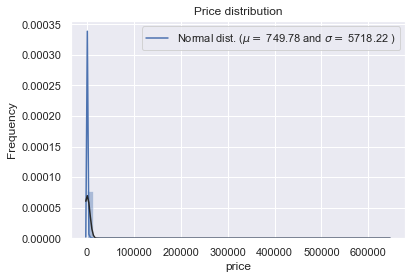

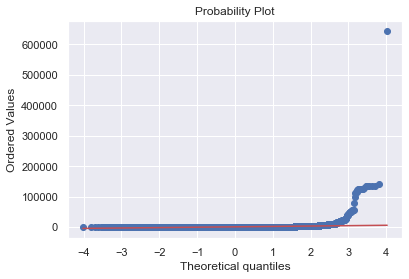

In [13]:
# grafico para verificar a dispersão dos preços.

sns.distplot(dados_['price'] , fit=norm);

(mu, sigma) = norm.fit(dados_['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

fig = plt.figure()
res = stats.probplot(dados_['price'], plot=plt)
plt.show()

Algo chama atenção: A presença de alguns outliers. Um inclusive, bem distante dos demais valores observados. A seguir um sort de forma a observar melhor esses valores:

In [14]:
dados_['price'].sort_values(ascending = True)

23556         0.0
11756        32.0
9595         33.0
22071        34.0
10139        35.0
           ...   
23966    136267.0
23876    136267.0
22494    136267.0
18638    140498.0
8248     644121.0
Name: price, Length: 24030, dtype: float64

Como a variável de interesse é o preço e para fins de estimação, futuramente a variável será transformada em logaritmo, então será necessário dropar o valor em que o preço é zero - provavelmente foi algum erro. 

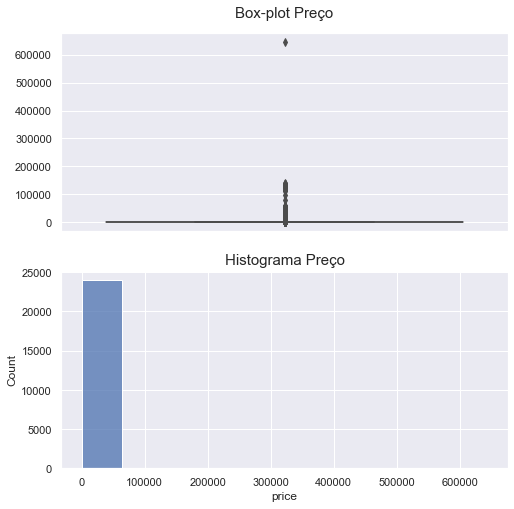

In [15]:
fig, ax = plt.subplots(2, 1, figsize=(8, 8))

g = sns.boxplot(data=dados_['price'], ax=ax[0])
g.set_title('Box-plot Preço', fontsize = 15, y =1.05)
g.set(xticklabels=[]) 
g.set(xlabel=None)
g.tick_params(bottom=False)

hist = sns.histplot(data=dados_, x="price", bins=10, ax=ax[1])
hist.set_title('Histograma Preço', fontsize = 15)

plt.show()

In [16]:
# dropando os preços que forem iguais a zero - há apenas um:
dados_ = dados_[(dados_[['price']] != 0).all(axis=1)]
dados_.reset_index(drop=True, inplace=True)
dados_

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20201025230850,2020-10-26,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. <br />- Large b...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,https://www.airbnb.com/users/show/68997,...,10.0,10.0,9.0,NaN,t,1,1,0,0,2.04
1,21280,https://www.airbnb.com/rooms/21280,20201025230850,2020-10-26,Renovated Modern Apt. Near Beach,Immaculately renovated top-floor apartment ove...,This is the best neighborhood in Zona Sul. Fo...,https://a0.muscache.com/pictures/60851312/b22e...,81163,https://www.airbnb.com/users/show/81163,...,10.0,10.0,10.0,NaN,f,1,1,0,0,1.15
2,25026,https://www.airbnb.com/rooms/25026,20201025230850,2020-10-26,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/3003965/68ebb...,3746246,https://www.airbnb.com/users/show/3746246,...,10.0,10.0,9.0,NaN,f,12,12,0,0,1.88
3,35636,https://www.airbnb.com/rooms/35636,20201025230850,2020-10-26,Cosy flat close to Ipanema beach,This cosy apartment is just a few steps away ...,The apartment street is very quiet and safe ....,https://a0.muscache.com/pictures/20009355/38b6...,153232,https://www.airbnb.com/users/show/153232,...,10.0,10.0,9.0,NaN,f,1,1,0,0,2.12
4,35764,https://www.airbnb.com/rooms/35764,20201025230850,2020-10-26,COPACABANA SEA BREEZE - RIO - 20 X Superhost,Our newly renovated studio is located in the b...,Our guests will experience living with a local...,https://a0.muscache.com/pictures/23782972/1d3e...,153691,https://www.airbnb.com/users/show/153691,...,10.0,10.0,10.0,NaN,f,1,1,0,0,2.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24024,46041144,https://www.airbnb.com/rooms/46041144,20201025230850,2020-10-26,Great apartment in Leblon,NaN,NaN,https://a0.muscache.com/pictures/5391ed61-5eb4...,15671309,https://www.airbnb.com/users/show/15671309,...,NaN,NaN,NaN,NaN,f,3,3,0,0,NaN
24025,46045547,https://www.airbnb.com/rooms/46045547,20201025230850,2020-10-26,Excelente casa proximo Vila Militar,"Excelente casa, aconchegante próx. comércio, s...",NaN,https://a0.muscache.com/pictures/011e3554-6b75...,150142034,https://www.airbnb.com/users/show/150142034,...,NaN,NaN,NaN,NaN,t,2,2,0,0,NaN
24026,46045682,https://www.airbnb.com/rooms/46045682,20201025230850,2020-10-26,No Coração do Leblon ...Reveillon 2020,"Melhor localidade do Leblon, 3 quadras da prai...",NaN,https://a0.muscache.com/pictures/75d921a2-cf0a...,321974870,https://www.airbnb.com/users/show/321974870,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
24027,46047007,https://www.airbnb.com/rooms/46047007,20201025230850,2020-10-26,Aconchego em Ipanema,"Trata-se de um apartamento aconchegante, com m...",Ipanema é um baixo para quem procura desde uma...,https://a0.muscache.com/pictures/ac5589cd-bb7e...,131908016,https://www.airbnb.com/users/show/131908016,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN


In [17]:
dados_['price'].sort_values(ascending = True)

11756        32.0
9595         33.0
22071        34.0
5024         35.0
22086        35.0
           ...   
23965    136267.0
22494    136267.0
23874    136267.0
18638    140498.0
8248     644121.0
Name: price, Length: 24029, dtype: float64

Pelo fato se existirem muitos outliers de preço, mas todos acima da média, a princípo optarei por excluir os imóveis com valores acima de R$ 2.000,00. Um dos objetivos futuros é melhorar o tratamento desses outliers.

In [18]:
Q1 = dados_['price'].quantile(0.95)
Q1

2000.0

In [19]:
# pela presença de alguns outliers, optei por dropar os valores acima do percentil 95.
# dropando os valores acima do percentil 95:
price_drop = dados_[(dados_['price'] <= dados_['price'].quantile(0.95))]
price_drop.reset_index(drop=True, inplace=True)

C:\Users\Manoel\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 395.11 and sigma = 385.24



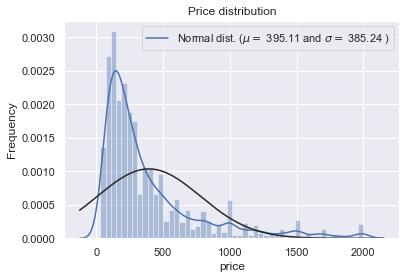

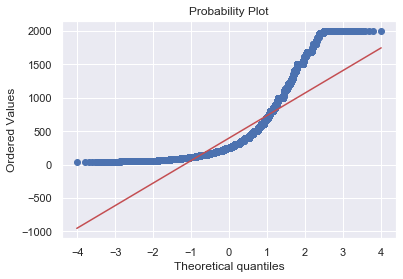

In [20]:
# normalizando os prços e plotando o gráfico após o drop dos outliers.

sns.distplot(price_drop['price'] , fit=norm);

(mu, sigma) = norm.fit(price_drop['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

fig = plt.figure()
res = stats.probplot(price_drop['price'], plot=plt)
plt.show()

Como é possível observar, o comportamento da distribuição melhorou, mas ainda não é o ideal. Mais a frente, farei outro tratamento na variável preço.

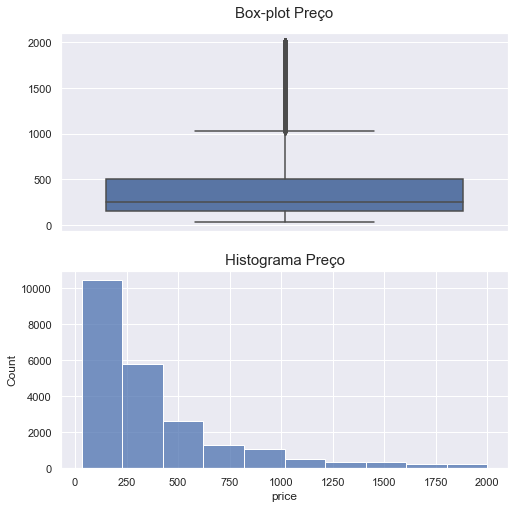

In [21]:
fig, ax = plt.subplots(2, 1, figsize=(8, 8))

g = sns.boxplot(data=price_drop['price'], ax=ax[0])
g.set_title('Box-plot Preço', fontsize = 15, y =1.05)
g.set(xticklabels=[]) 
g.set(xlabel=None)
g.tick_params(bottom=False)

hist = sns.histplot(data=price_drop, x="price", bins=10, ax=ax[1])
hist.set_title('Histograma Preço', fontsize = 15)

plt.show()

O histograma e box-plot do preço apois a exclusão dos valores acima do percentil 95.

In [22]:
price_drop['price'].describe()

count    22955.000000
mean       395.113439
std        385.252000
min         32.000000
25%        149.000000
50%        250.000000
75%        500.000000
max       2000.000000
Name: price, dtype: float64

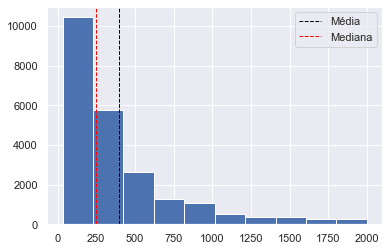

In [23]:
### Fazendo o histograma e traçando a média e a mediana dos preços.
hist_price1 = price_drop['price'].hist()
media = price_drop['price'].mean()
mediana = price_drop['price'].median()
plt.axvline(media, color='black', linestyle='dashed', linewidth=1)
plt.axvline(mediana, color='red', linestyle='dashed', linewidth=1)
plt.legend({'Média':media,'Mediana':mediana})
plt.show()

O histograma chama atenção por ser bem assimétrico. Conforme a faixa de preço aumenta, a quantidade de imóveis diminui de forma exponencial, indicando que boa parte dos imóveis ofertados estão no valor abaixo de R$ 500,00.
Quando olhando para o resultado do describe, ele reafirma as informações do histograma:

- a média do preço dos imóveis ofertados foi de R$ 395,11.
- a mediana foi de 250,00, ou seja, 50% dos valores estão abaixo de 250.
- 75% das observações estão abaixo do valor de 500,00.

Ou seja, os percentis mostram o como o preço é desbalanceado tendo 75% dos imóveis com valor de até 750,00.

O próximo passo é separar o dataframe em dois: nas variáveis que já estão como object e as que não, de forma a ajustar as que
estão como objetct como categóricas ou transformar em númericas aquelas que estão como string.
Além disso, determinar quais variáveis podem sem revelantes para o modelo e excluir aquelas que não seriam.

In [24]:
# verificando as variáveis categóricas
categorical_features = list(price_drop.select_dtypes(include=['object']).columns)
print("variáveis categóricas : " + str(len(categorical_features)))
categorical_features

variáveis categóricas : 32


['listing_url',
 'last_scraped',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'property_type',
 'room_type',
 'bathrooms_text',
 'amenities',
 'has_availability',
 'calendar_last_scraped',
 'first_review',
 'last_review',
 'instant_bookable']

In [25]:
# variáveis numéricas
numerical_features = list(price_drop.select_dtypes(exclude = ["object"]).columns)
print("variáveis numéricas : " + str(len(numerical_features)))
numerical_features

variáveis numéricas : 42


['id',
 'scrape_id',
 'host_id',
 'host_listings_count',
 'host_total_listings_count',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'license',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'reviews_per_month']

# Variáveis categóricas:

Após separar as variáveis entre categóricas e númericas, a ideia é trabalhar cada uma delas. Assim, as categóricas serão transformadas em dummies ou retransformadas em numéricas. O objetivo é preparar os dados para a modelagem. Assim, as variáveis tradas nessa seção serão as seguintes:

- host_response_rate - é de se esperar que se o host tem uma boa taxa de respostas, seu imóvel seja mais locado e consequentemente tenha um preço maior.
- superhost e identity - ambos oferecem maior segurança ao locatário e faz com que o mesmo possa estar disposto a pagar mais.
- neighbourhood_cleansed - bairro da locação. É de se esperar que alguns sejam áeas mais nobres e afetem diretamente os preços.
- room_type - tipo de quarto também afeta diretamente o preço. É de se esperar que apartamentos inteiros sejam mais caros que quartos privados.
- bathrooms_text - quantidade de banheiros afeta também o preço. É de se eperar que apartamentos com mais banheiros sejam mais caros.

a partir desse seleção, exceto host_response_rate e bathrooms_text foram tranformadas em dummies.

In [26]:
"""
separando apenas os dados categóricos, com o obkjetivo de transformar e trabalhar algumas das variáveis.
"""

limpando_cat = price_drop[categorical_features]
dados_categoricos = limpando_cat.drop(['listing_url', 'last_scraped', 'name', 'neighborhood_overview', 'picture_url', 'host_url',
                   'host_since', 'host_location', 'amenities', 'calendar_last_scraped', 'first_review', 'last_review',
                   'description', 'host_name', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_acceptance_rate',
                   'host_has_profile_pic', 'neighbourhood', 'host_has_profile_pic', 'host_response_time', 'host_verifications',
                   'property_type', 'host_neighbourhood'], axis = 1)
dados_categoricos.reset_index(drop=True, inplace=True)
dados_categoricos

,host_response_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,room_type,bathrooms_text,has_availability,instant_bookable
0,100%,t,t,Copacabana,Entire home/apt,1 bath,t,t
1,100%,f,t,Ipanema,Entire home/apt,2 baths,t,f
2,100%,f,t,Copacabana,Entire home/apt,1 bath,t,f
3,100%,f,t,Ipanema,Entire home/apt,1.5 baths,t,f
4,93%,t,t,Copacabana,Entire home/apt,1 bath,t,f
...,...,...,...,...,...,...,...,...
22950,100%,f,t,Leblon,Entire home/apt,1 bath,t,f
22951,100%,f,t,Padre Miguel,Entire home/apt,1 bath,t,t
22952,100%,f,t,Leblon,Entire home/apt,2 baths,t,f
22953,NaN,f,f,Ipanema,Entire home/apt,1 bath,t,t


In [27]:
dados_categoricos.isnull().sum(axis = 0)

host_response_rate        7211
host_is_superhost            7
host_identity_verified       7
neighbourhood_cleansed       0
room_type                    0
bathrooms_text              62
has_availability             0
instant_bookable             0
dtype: int64

In [28]:
def gerando_dummies(subconjunto):
    
    """
    gera variáveis dummies. Como algumas colunas possuem t como true e f como false, fiz uma função para transformar 
    essas variáveis em dummies.

    input é a coluna a ser transformada, string com t ou f.
    output é a coluna contendo zero ou um, dependendo se for t, retorna 1, caso contrário, zero.
    """
    if subconjunto == 't':
        return 1
    else:
        return 0

In [29]:
# aplicando a função acima nas colunas selecionadas
dados_categoricos['host_is_superhost'] = dados_categoricos['host_is_superhost'].apply(gerando_dummies)
dados_categoricos['host_identity_verified'] = dados_categoricos['host_identity_verified'].apply(gerando_dummies)
dados_categoricos['instant_bookable'] = dados_categoricos['instant_bookable'].apply(gerando_dummies)
dados_categoricos['has_availability'] = dados_categoricos['has_availability'].apply(gerando_dummies)

dados_categoricos

,host_response_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,room_type,bathrooms_text,has_availability,instant_bookable
0,100%,1,1,Copacabana,Entire home/apt,1 bath,1,1
1,100%,0,1,Ipanema,Entire home/apt,2 baths,1,0
2,100%,0,1,Copacabana,Entire home/apt,1 bath,1,0
3,100%,0,1,Ipanema,Entire home/apt,1.5 baths,1,0
4,93%,1,1,Copacabana,Entire home/apt,1 bath,1,0
...,...,...,...,...,...,...,...,...
22950,100%,0,1,Leblon,Entire home/apt,1 bath,1,0
22951,100%,0,1,Padre Miguel,Entire home/apt,1 bath,1,1
22952,100%,0,1,Leblon,Entire home/apt,2 baths,1,0
22953,NaN,0,0,Ipanema,Entire home/apt,1 bath,1,1


In [30]:
"""
como algumas colunas do bathrooms_text está apenas como texto, então essa células transformam todas as linhas que são
apenas texto com a quantidade de banheiro em número como as demais:
"""  
dados_categoricos.loc[dados_categoricos['bathrooms_text'] == 'Private half-bath', 'bathrooms_text'] = '1 private bath'
dados_categoricos.loc[dados_categoricos['bathrooms_text'] == 'Half-bath', 'bathrooms_text'] = '0.5 bath'
dados_categoricos.loc[dados_categoricos['bathrooms_text'] == 'Shared half-bath', 'bathrooms_text'] = '0.5 bath'

Como algumas variáveis de interesse estão como string, o próximo passo é transformá-las em float ou int.

In [31]:
# fazendo replace dos nan por 0 nas colunas host_response_rate e bathrooms_text

dados_categoricos['host_response_rate'] = dados_categoricos['host_response_rate'].replace(np.nan, '0%')
dados_categoricos['bathrooms_text'] = dados_categoricos['bathrooms_text'].replace(np.nan, '0 baths')

In [32]:
def reescrevendo(subconjunto):
    
    """
    pega apenas as variáveis que foram consideradas númericas e as retorna, deixando o resto da string de fora.
    por exemplo: 1 bath, retorna apenas 1. Caso estiver 1.5 baths, retorna 1.5 e assim sucessivamente.

    input é uma coluna do dataframe com string, mas que tenha números a ser encontrados.
    output é apenas os números da string, mas ainda com str. Após passas a função, são transformados em float.
    """
    
    lista = []
    numeros = set('0123456789.')
    for j in subconjunto:            
        if j in numeros:
            lista.append(j)
    res = (''.join(lista))
     
    return res

In [33]:
# reescrevendo as variáveis que estão como string em float ou int.

dados_categoricos['bathrooms_text'] = dados_categoricos['bathrooms_text'].apply(reescrevendo).astype(float)
dados_categoricos['host_response_rate'] = dados_categoricos['host_response_rate'].apply(reescrevendo).astype(float)/100

In [34]:
"""def separando_regiao(subset):
    
    zona_sul = ['Ipanema', 'Copacabana', 'Flamengo', 'Gávea', 'Leblon', 'Laranjeiras', 'Humaitá', 'Lagoa', 'Jardim Botânico',
                'Leme', 'Leme', 'Urca', 'Alto da Boa Vista']

    barra_jpa = ['Jacarepaguá', 'Barra da Tijuca', 'São Conrado', 'Recreio dos Bandeirantes', 'Vargem Grande', 'Vargem Pequena',
                 'Taquara', 'Barra de Guaratiba']
    
    if subset in zona_sul:
        return 'Zona Sul'
    elif subset in barra_jpa:
        return 'Barra/Jpa'
    else:
        return 'Outros'
"""

"def separando_regiao(subset):\n    \n    zona_sul = ['Ipanema', 'Copacabana', 'Flamengo', 'Gávea', 'Leblon', 'Laranjeiras', 'Humaitá', 'Lagoa', 'Jardim Botânico',\n                'Leme', 'Leme', 'Urca', 'Alto da Boa Vista']\n\n    barra_jpa = ['Jacarepaguá', 'Barra da Tijuca', 'São Conrado', 'Recreio dos Bandeirantes', 'Vargem Grande', 'Vargem Pequena',\n                 'Taquara', 'Barra de Guaratiba']\n    \n    if subset in zona_sul:\n        return 'Zona Sul'\n    elif subset in barra_jpa:\n        return 'Barra/Jpa'\n    else:\n        return 'Outros'\n"

In [35]:
# dados_categoricos['regiao'] = dados_categoricos['neighbourhood_cleansed'].apply(separando_regiao)

In [36]:
# dados_categoricos = dados_categoricos.assign(zona_sul = 0 ,barra_jpa = 0, outros_bairros = 0)

In [37]:
dados_categoricos

,host_response_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,room_type,bathrooms_text,has_availability,instant_bookable
0,1.00,1,1,Copacabana,Entire home/apt,1.0,1,1
1,1.00,0,1,Ipanema,Entire home/apt,2.0,1,0
2,1.00,0,1,Copacabana,Entire home/apt,1.0,1,0
3,1.00,0,1,Ipanema,Entire home/apt,1.5,1,0
4,0.93,1,1,Copacabana,Entire home/apt,1.0,1,0
...,...,...,...,...,...,...,...,...
22950,1.00,0,1,Leblon,Entire home/apt,1.0,1,0
22951,1.00,0,1,Padre Miguel,Entire home/apt,1.0,1,1
22952,1.00,0,1,Leblon,Entire home/apt,2.0,1,0
22953,0.00,0,0,Ipanema,Entire home/apt,1.0,1,1


In [38]:
dados_categoricos['neighbourhood_cleansed']

0             Copacabana
1                Ipanema
2             Copacabana
3                Ipanema
4             Copacabana
              ...       
22950             Leblon
22951       Padre Miguel
22952             Leblon
22953            Ipanema
22954    Barra da Tijuca
Name: neighbourhood_cleansed, Length: 22955, dtype: object

In [39]:
# gerando as dummies a partir do tipo de quarto:
#dados_categoricos = pd.get_dummies(dados_categoricos, columns=["room_type"], prefix=["Tipo_Quarto"])
#dados_categoricos = pd.get_dummies(dados_categoricos, columns=["regiao"], prefix=["Regiao"])

In [40]:
quarto = pd.get_dummies(dados_categoricos['room_type'])
#regiao = pd.get_dummies(dados_categoricos['regiao'])

In [41]:
#regiao

In [42]:
dados_categoricos

,host_response_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,room_type,bathrooms_text,has_availability,instant_bookable
0,1.00,1,1,Copacabana,Entire home/apt,1.0,1,1
1,1.00,0,1,Ipanema,Entire home/apt,2.0,1,0
2,1.00,0,1,Copacabana,Entire home/apt,1.0,1,0
3,1.00,0,1,Ipanema,Entire home/apt,1.5,1,0
4,0.93,1,1,Copacabana,Entire home/apt,1.0,1,0
...,...,...,...,...,...,...,...,...
22950,1.00,0,1,Leblon,Entire home/apt,1.0,1,0
22951,1.00,0,1,Padre Miguel,Entire home/apt,1.0,1,1
22952,1.00,0,1,Leblon,Entire home/apt,2.0,1,0
22953,0.00,0,0,Ipanema,Entire home/apt,1.0,1,1


In [43]:
# transforma o tipo de quarto em variável dummie.
cat = pd.concat([dados_categoricos, quarto], axis=1, join='inner')

In [44]:
cat

,host_response_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,room_type,bathrooms_text,has_availability,instant_bookable,Entire home/apt,Hotel room,Private room,Shared room
0,1.00,1,1,Copacabana,Entire home/apt,1.0,1,1,1,0,0,0
1,1.00,0,1,Ipanema,Entire home/apt,2.0,1,0,1,0,0,0
2,1.00,0,1,Copacabana,Entire home/apt,1.0,1,0,1,0,0,0
3,1.00,0,1,Ipanema,Entire home/apt,1.5,1,0,1,0,0,0
4,0.93,1,1,Copacabana,Entire home/apt,1.0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
22950,1.00,0,1,Leblon,Entire home/apt,1.0,1,0,1,0,0,0
22951,1.00,0,1,Padre Miguel,Entire home/apt,1.0,1,1,1,0,0,0
22952,1.00,0,1,Leblon,Entire home/apt,2.0,1,0,1,0,0,0
22953,0.00,0,0,Ipanema,Entire home/apt,1.0,1,1,1,0,0,0


# Variáveis numéricas:

In [45]:
"""limpando_num = price_drop[numerical_features]
dados_numericos = limpando_num.drop(['id', 'scrape_id', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'bathrooms', 'license',
                  'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms',
                  'host_id', 'host_total_listings_count', 'minimum_minimum_nights', 'calculated_host_listings_count',
                  'maximum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights',
                  'number_of_reviews_l30d', 'minimum_nights_avg_ntm', 'calendar_updated', 'maximum_nights_avg_ntm',
                  'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews_ltm'], axis = 1)
dados_numericos.reset_index(drop=True, inplace=True)
"""

"limpando_num = price_drop[numerical_features]\ndados_numericos = limpando_num.drop(['id', 'scrape_id', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'bathrooms', 'license',\n                  'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms',\n                  'host_id', 'host_total_listings_count', 'minimum_minimum_nights', 'calculated_host_listings_count',\n                  'maximum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights',\n                  'number_of_reviews_l30d', 'minimum_nights_avg_ntm', 'calendar_updated', 'maximum_nights_avg_ntm',\n                  'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews_ltm'], axis = 1)\ndados_numericos.reset_index(drop=True, inplace=True)\n"

In [46]:
"""
selecionando apenas as variáveis numéricas, para tratá-las - substituir os nan's pelas médias de cada respectiva coluna.
"""

limpando_num = price_drop[numerical_features]
dados_numericos = limpando_num.drop(['id', 'scrape_id', 'neighbourhood_group_cleansed', 'bathrooms', 'license',
                  'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms',
                  'host_id', 'host_total_listings_count', 'minimum_minimum_nights', 'calculated_host_listings_count',
                  'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights',
                  'number_of_reviews_l30d', 'minimum_nights_avg_ntm', 'calendar_updated', 'maximum_nights_avg_ntm',], axis = 1)
dados_numericos.reset_index(drop=True, inplace=True)

a seguir o detalhamento da escolha de cada variável:
accommodates, bedrooms, beds: dá uma ideia do tamanho da locação, se o quarto é individual ou não (é de se esperar que um quarto individual seja mais caro que um compartilhado) ou não e acaba afetando o preço.
todos os review: dá uma ideia da avaliação geral da experiência e segurança a quem for locar.

In [47]:
dados_numericos.describe()

,host_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,...,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_entire_homes,reviews_per_month
count,22948.000000,22955.000000,22955.000000,22955.000000,21442.000000,22723.000000,22955.000000,22955.000000,2.295500e+04,22955.000000,...,22955.000000,14451.000000,14439.000000,14442.000000,14440.000000,14445.000000,14440.000000,14442.000000,22955.000000,15002.000000
mean,7.352798,-22.964293,-43.249266,3.991157,1.623309,2.452537,395.113439,4.684034,4.419055e+04,20.594860,...,2.977303,94.733513,9.656486,9.412547,9.813573,9.774386,9.769044,9.309652,5.105729,0.573756
std,27.227911,0.035681,0.096937,2.333627,0.940427,1.975374,385.252000,18.173591,6.600261e+06,11.782937,...,6.135999,9.301139,0.891471,1.086968,0.715995,0.777867,0.724200,1.027805,19.216409,0.780492
min,0.000000,-23.072970,-43.704790,1.000000,1.000000,0.000000,32.000000,1.000000,1.000000e+00,0.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.010000
25%,1.000000,-22.984200,-43.306675,2.000000,1.000000,1.000000,149.000000,1.000000,3.000000e+01,10.000000,...,0.000000,93.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,1.000000,0.100000
50%,2.000000,-22.970550,-43.196350,4.000000,1.000000,2.000000,250.000000,2.000000,1.125000e+03,28.000000,...,0.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,0.240000
75%,4.000000,-22.946600,-43.186240,5.000000,2.000000,3.000000,500.000000,4.000000,1.125000e+03,30.000000,...,3.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,0.750000
max,458.000000,-22.749820,-43.104860,16.000000,30.000000,50.000000,2000.000000,730.000000,1.000000e+09,30.000000,...,125.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,194.000000,9.450000


In [48]:
dados_numericos.isnull().sum(axis = 0)

host_listings_count                               7
latitude                                          0
longitude                                         0
accommodates                                      0
bedrooms                                       1513
beds                                            232
price                                             0
minimum_nights                                    0
maximum_nights                                    0
availability_30                                   0
availability_60                                   0
availability_90                                   0
availability_365                                  0
number_of_reviews                                 0
number_of_reviews_ltm                             0
review_scores_rating                           8504
review_scores_accuracy                         8516
review_scores_cleanliness                      8513
review_scores_checkin                          8515
review_score

Como algumas linhas dessas colunas estão como missing values, tais valores serão substituidos pelas suas respectivas médias.

In [49]:
colunas = list(dados_numericos.columns)

In [50]:
# Fazendo substituição dos nan's pela média, nas variáveis numéricas.
for features in colunas:
    dados_numericos.update(dados_numericos[features].fillna(math.floor(dados_numericos[features].mean())))

In [51]:
dados_numericos.isnull().sum(axis = 0)

host_listings_count                            0
latitude                                       0
longitude                                      0
accommodates                                   0
bedrooms                                       0
beds                                           0
price                                          0
minimum_nights                                 0
maximum_nights                                 0
availability_30                                0
availability_60                                0
availability_90                                0
availability_365                               0
number_of_reviews                              0
number_of_reviews_ltm                          0
review_scores_rating                           0
review_scores_accuracy                         0
review_scores_cleanliness                      0
review_scores_checkin                          0
review_scores_communication                    0
review_scores_locati

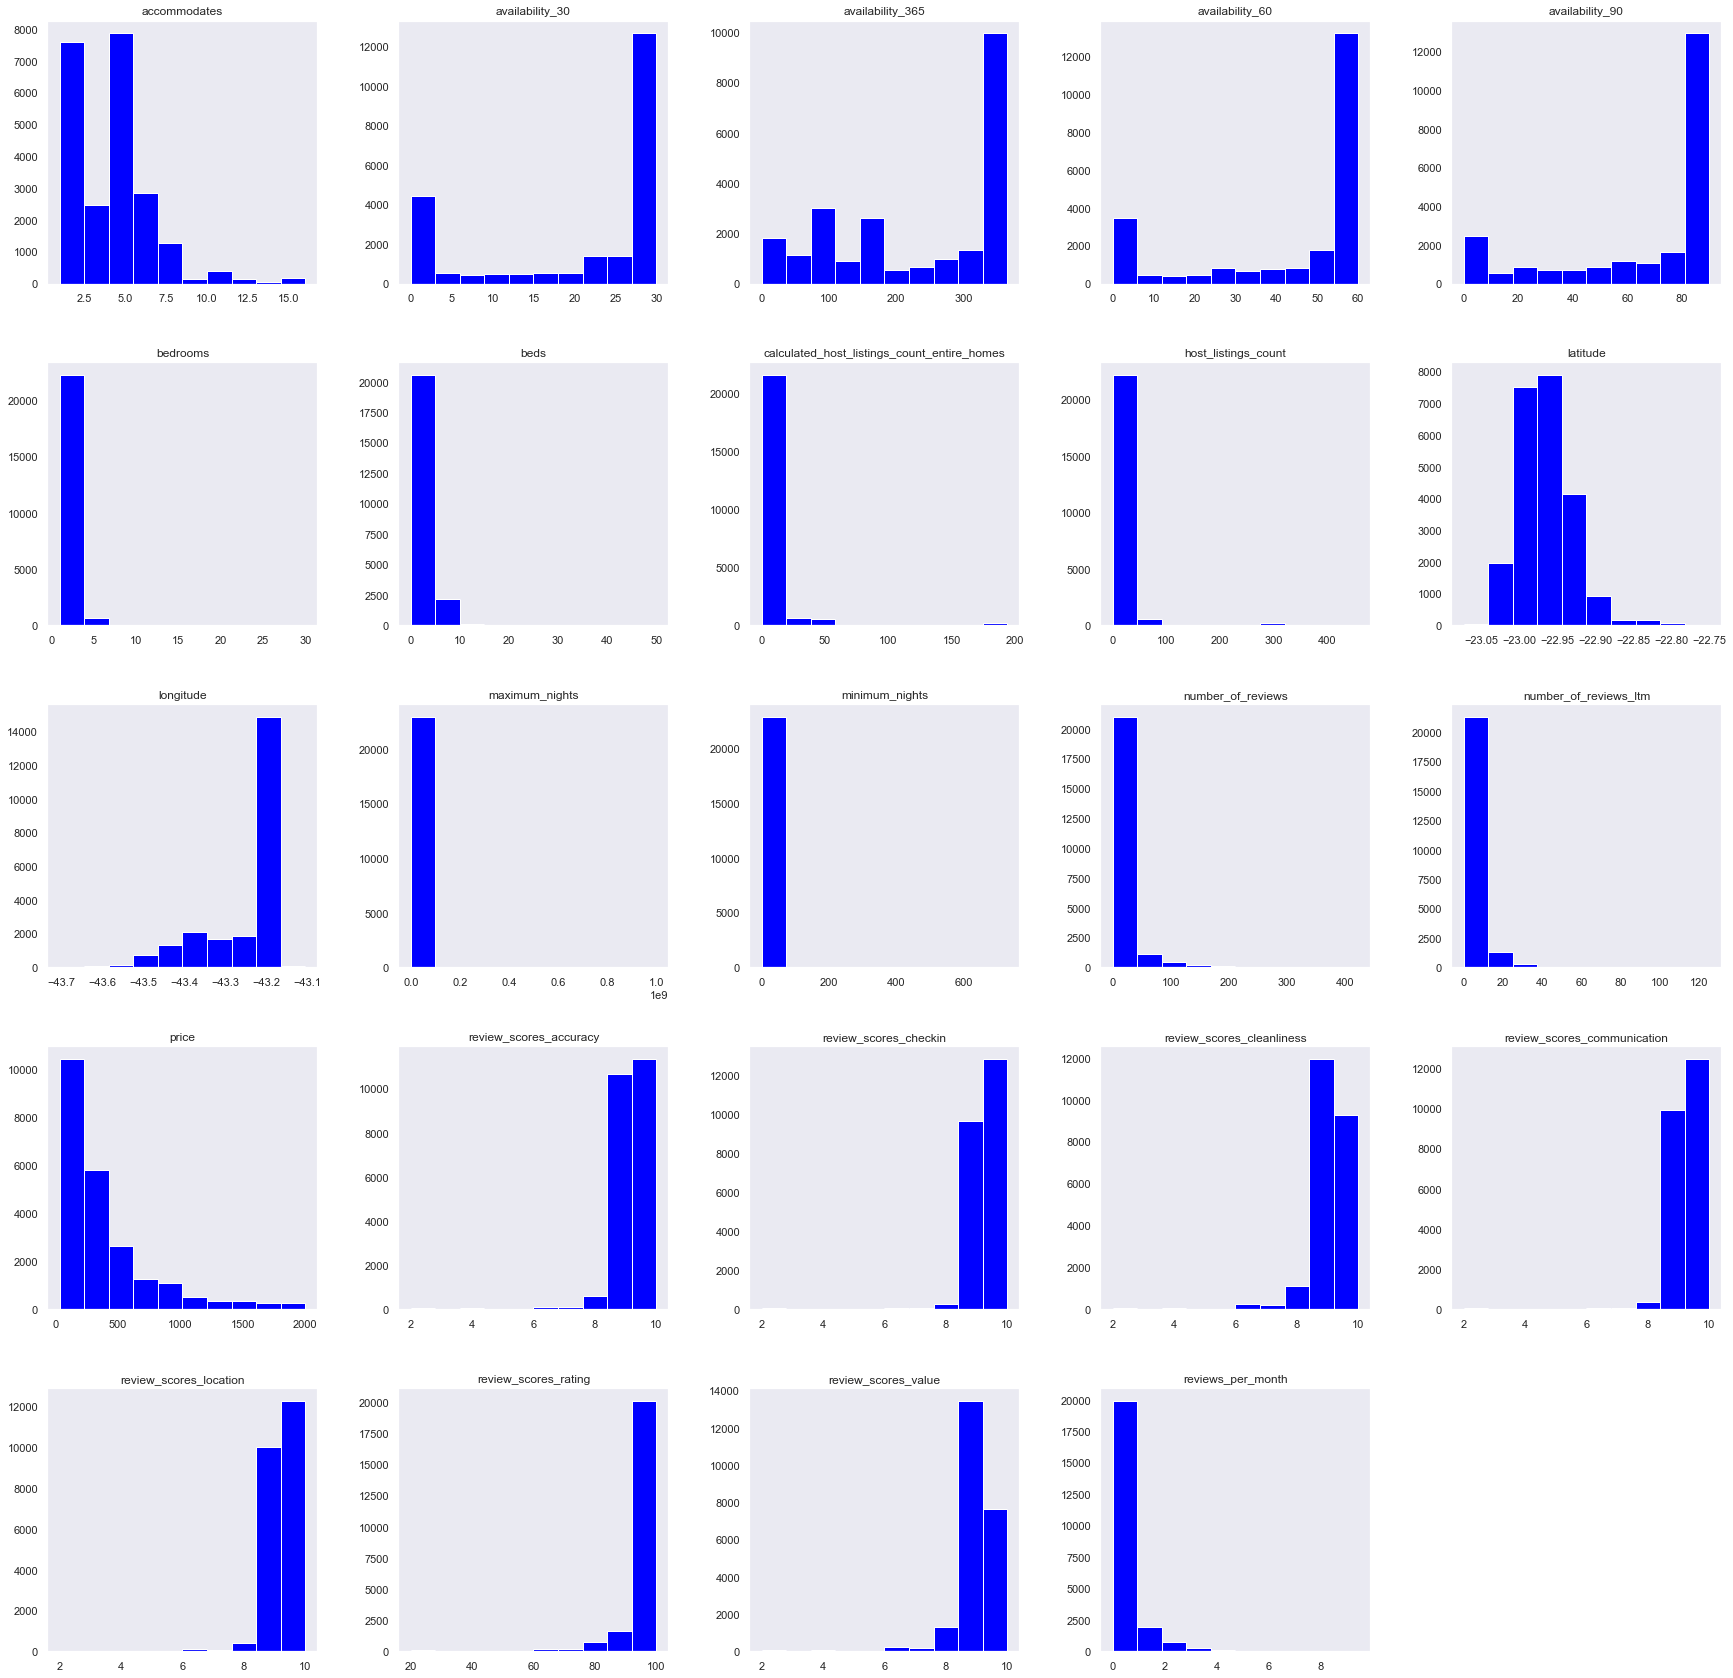

In [52]:
dados_numericos.hist(figsize = (30,30), grid = False, color ='blue')
plt.show()

In [53]:
# concatenando os dois dataframes, os numéricos e os categóricos:
dados = pd.concat([cat, dados_numericos], axis=1, join='inner')

In [54]:
# virificando os tipos de qurtos:
dados['room_type'].unique().tolist()

['Entire home/apt', 'Private room', 'Shared room', 'Hotel room']

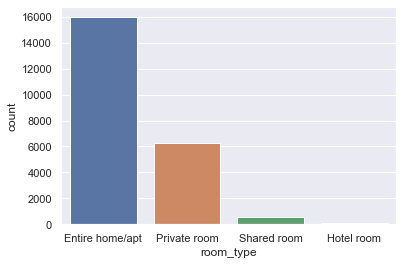

In [55]:
# plot do tipo de quarto.
sns.countplot(x='room_type', data=dados)
plt.show()
# obs: aqui utilizei o dataframe price_drop porque foi antes da transformação das dummies.

In [56]:
tipo_quarto_perc = dados['room_type'].value_counts(normalize=True) * 100
tipo_quarto = list(tipo_quarto_perc.keys())

In [57]:
# verificando o % por quartos:
for i in tipo_quarto:
    print(f"O percentual de imóveis com o tipo de quarto {i} é de {np.round ((tipo_quarto_perc[i]), 2)}%.")

O percentual de imóveis com o tipo de quarto Entire home/apt é de 69.6%.
O percentual de imóveis com o tipo de quarto Private room é de 27.44%.
O percentual de imóveis com o tipo de quarto Shared room é de 2.47%.
O percentual de imóveis com o tipo de quarto Hotel room é de 0.49%.


O gráfico em barras do 'room_type' mostra que apartamento/casa inteiro corresponde por boa parte dos anúncios (69.6%), sendo seguido por quarto privado (27.44%). Tanto quarto compartilhado (2.47%) como quarto de hotel (0.49%) representa uma proporção bem reduzida. Interessante que quarto inteiro tem mais que o dobro do segunto tipo mais disponível, ou seja, tem a maior ocorrência disparada.

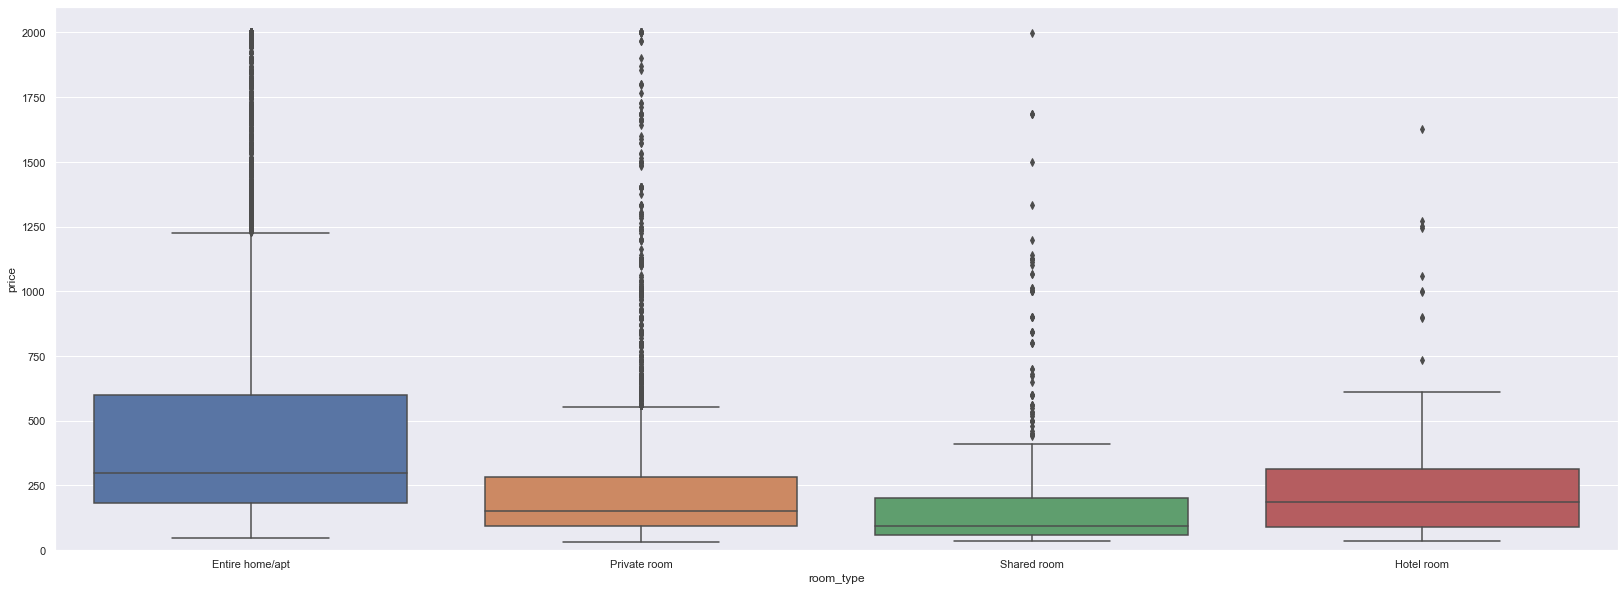

In [58]:
# acomodação x preço
var = 'room_type'
data = pd.concat([dados['price'], dados[var]], axis=1)
f, ax = plt.subplots(figsize=(28, 10))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=2100);

O box-plot bidimencional do preço x tipo do quarto tem um comportamento interessante:
Entire home/apt apresentou mais outliers, o que era esperado, uma vez que quase sozinho, detém quase 70% das observações. Os outliers diminuiem conforme a quantidade da amostra, o que faz sentido.
Além disso, como era o esperado, seu intervalo de preço é maior, uma vez que é o apartamento inteiro, ao contrário, quarto compartilhado tem o intervalo menor, e fica na menor faixa de preço.

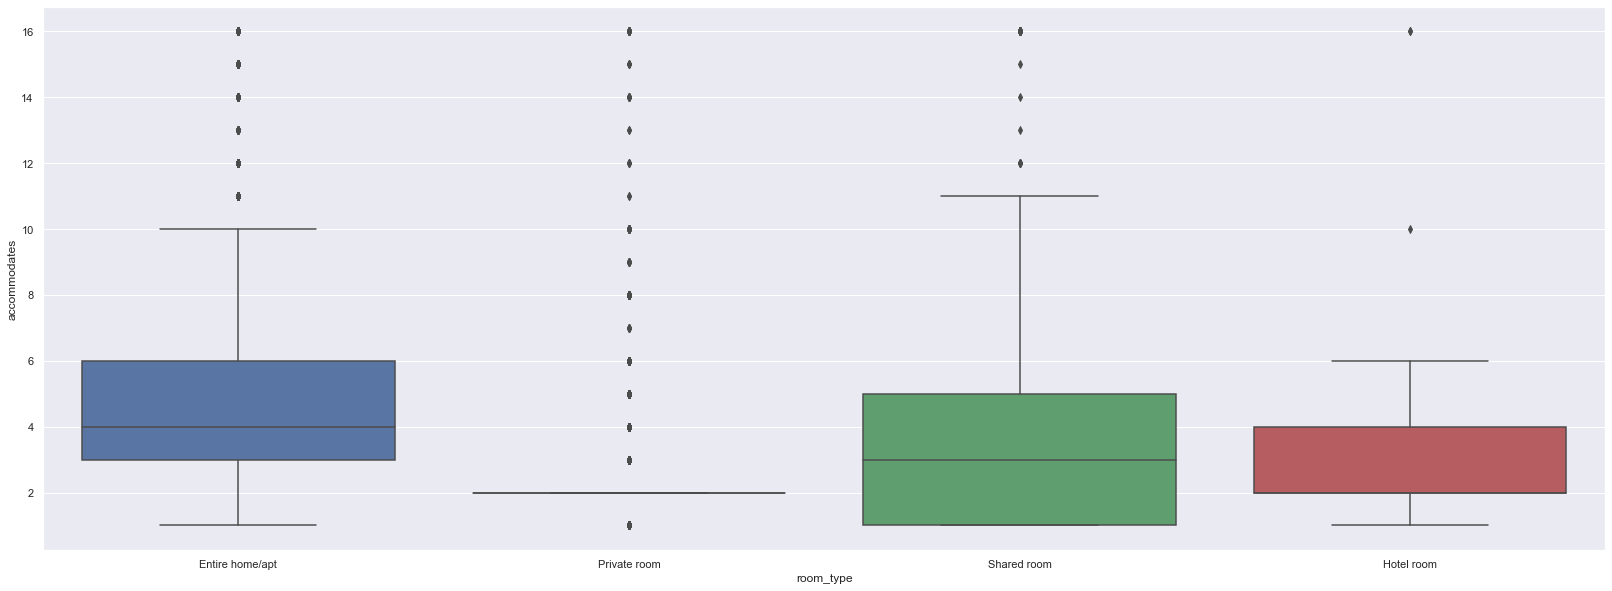

In [59]:
# acomodação x preço
var = 'room_type'
data = pd.concat([dados['accommodates'], dados[var]], axis=1)
f, ax = plt.subplots(figsize=(28, 10))
fig = sns.boxplot(x=var, y="accommodates", data=data)

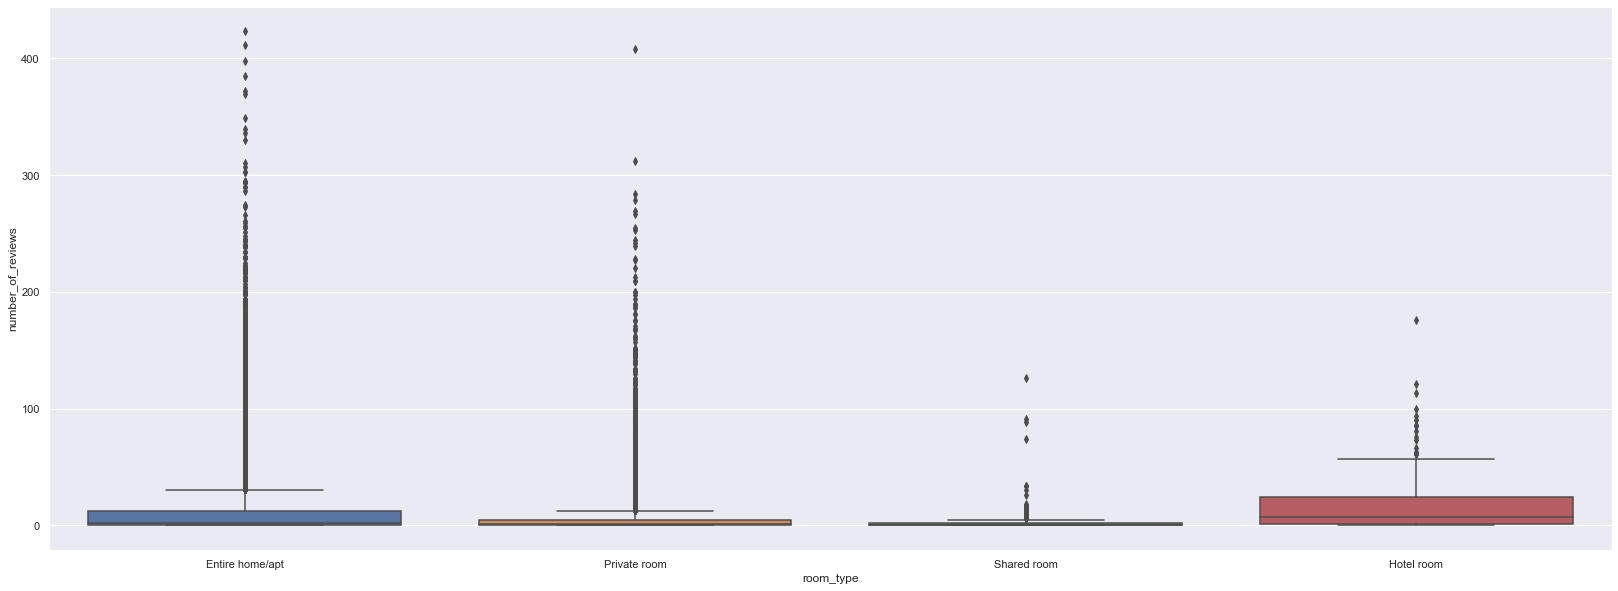

In [60]:
# acomodação x preço
var = 'room_type'
data = pd.concat([dados['number_of_reviews'], dados[var]], axis=1)
f, ax = plt.subplots(figsize=(28, 10))
fig = sns.boxplot(x=var, y="number_of_reviews", data=data)

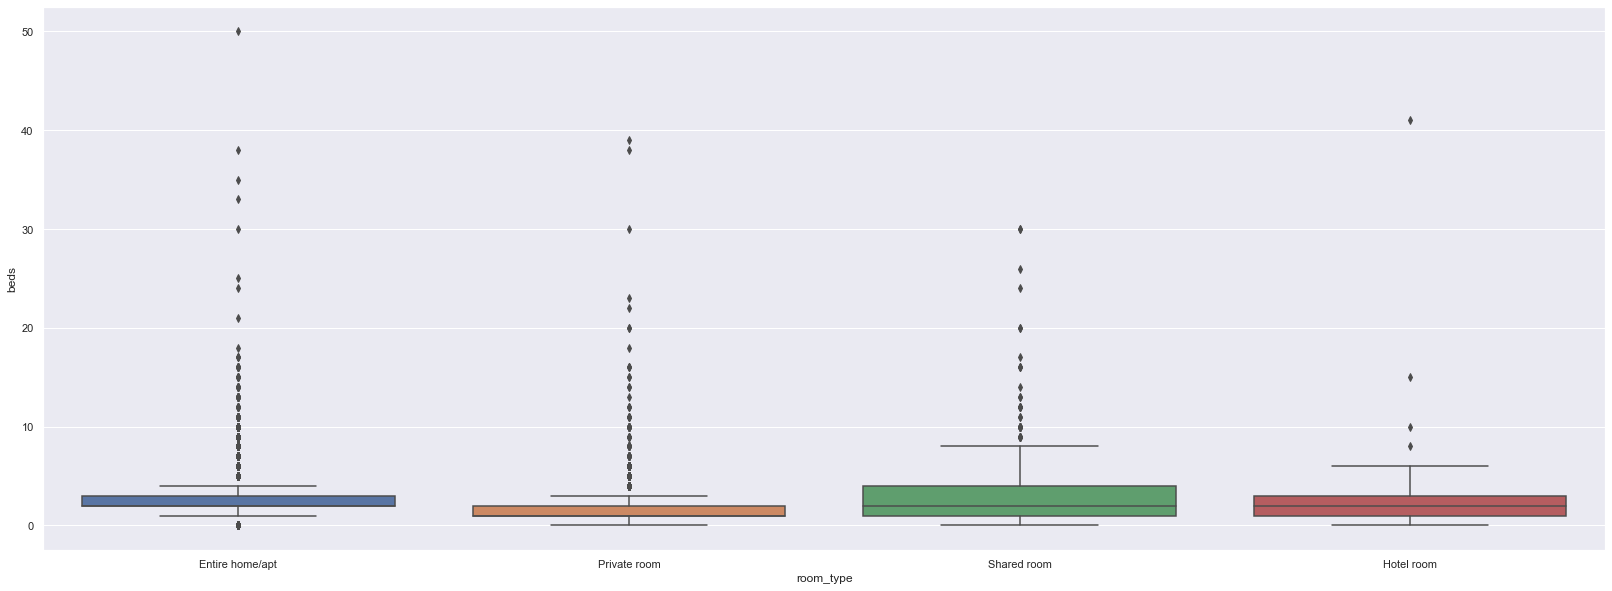

In [61]:
# acomodação x preço
var = 'room_type'
data = pd.concat([dados['beds'], dados[var]], axis=1)
f, ax = plt.subplots(figsize=(28, 10))
fig = sns.boxplot(x=var, y="beds", data=data)

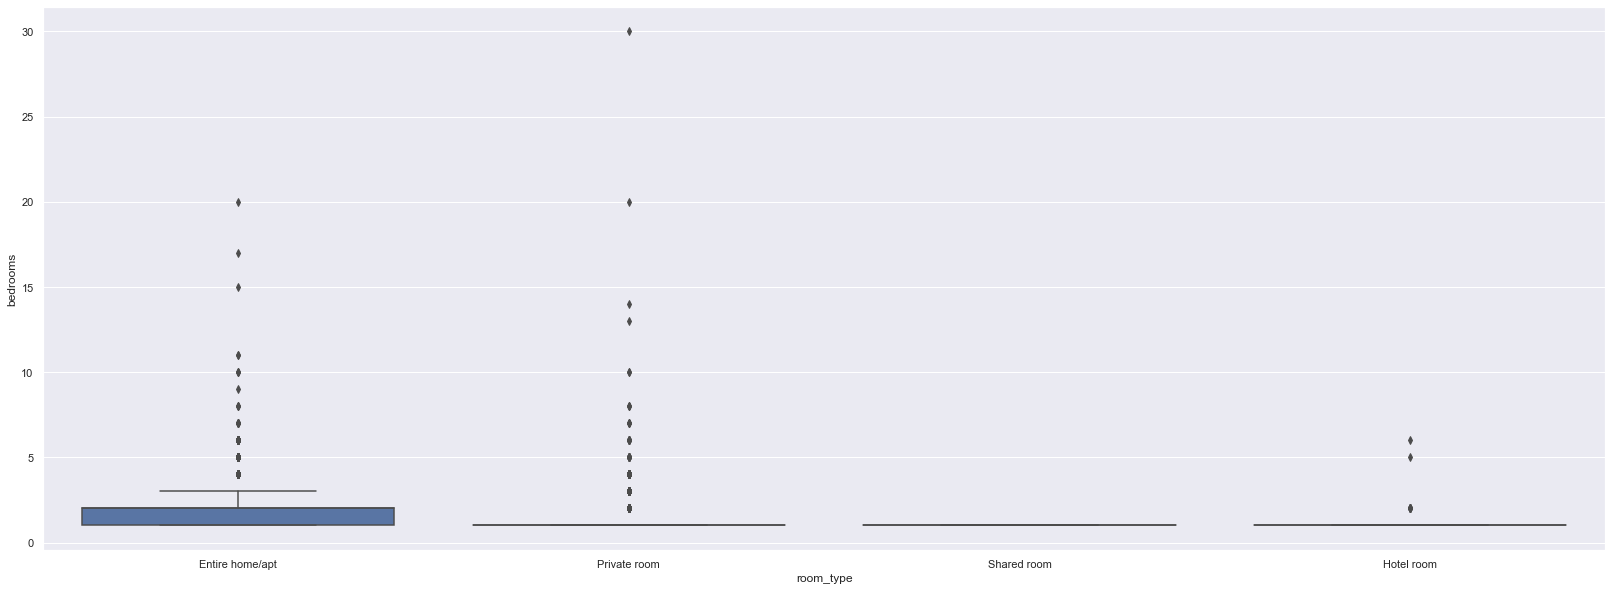

In [62]:
# acomodação x preço
var = 'room_type'
data = pd.concat([dados['bedrooms'], dados[var]], axis=1)
f, ax = plt.subplots(figsize=(28, 10))
fig = sns.boxplot(x=var, y="bedrooms", data=data)

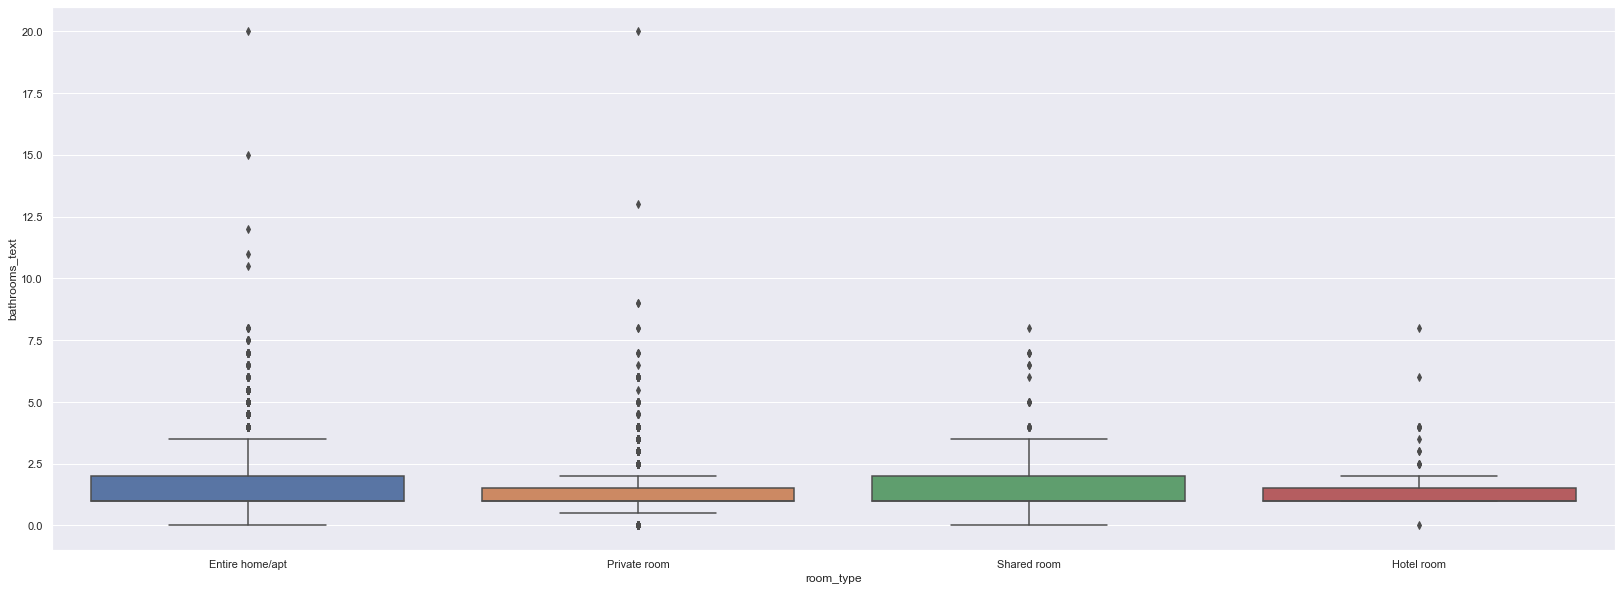

In [63]:
# acomodação x preço
var = 'room_type'
data = pd.concat([dados['bathrooms_text'], dados[var]], axis=1)
f, ax = plt.subplots(figsize=(28, 10))
fig = sns.boxplot(x=var, y="bathrooms_text", data=data)

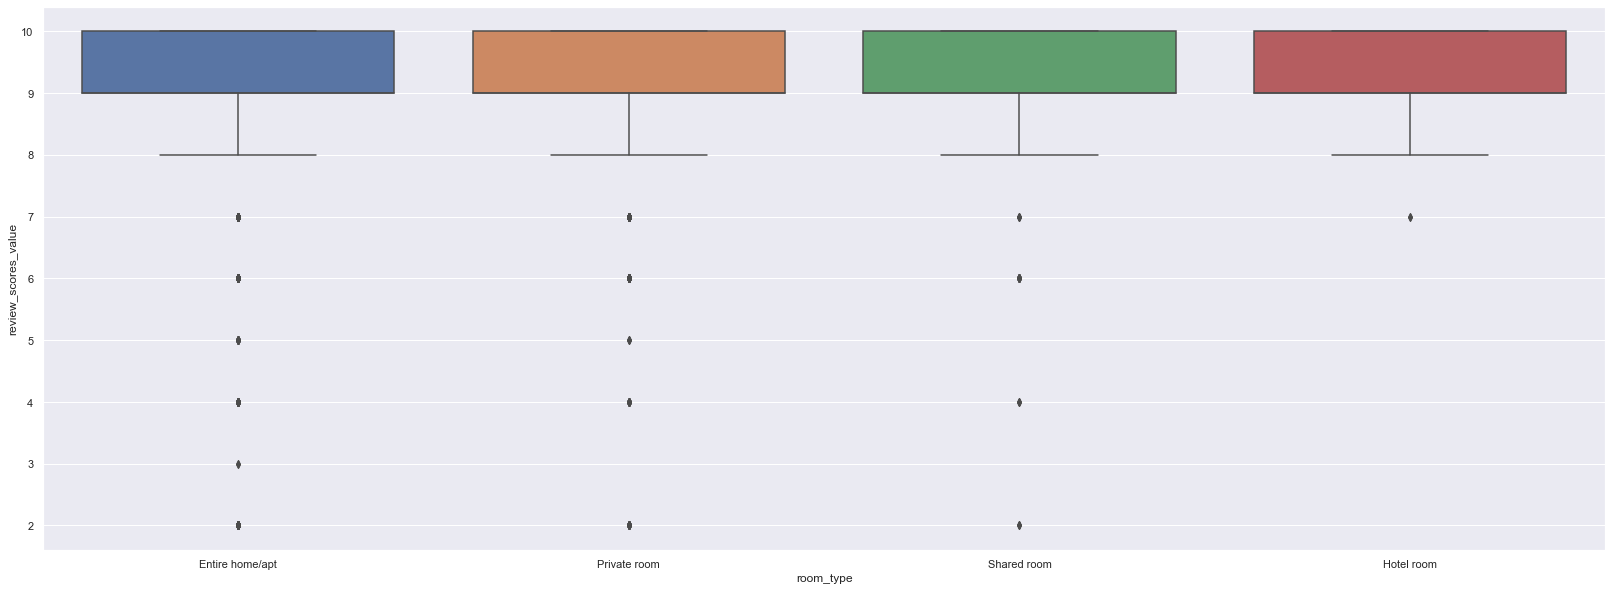

In [64]:
# acomodação x preço
var = 'room_type'
data = pd.concat([dados['review_scores_value'], dados[var]], axis=1)
f, ax = plt.subplots(figsize=(28, 10))
fig = sns.boxplot(x=var, y="review_scores_value", data=data)

In [65]:
dados.keys()

Index(['host_response_rate', 'host_is_superhost', 'host_identity_verified',
       'neighbourhood_cleansed', 'room_type', 'bathrooms_text',
       'has_availability', 'instant_bookable', 'Entire home/apt', 'Hotel room',
       'Private room', 'Shared room', 'host_listings_count', 'latitude',
       'longitude', 'accommodates', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count_entire_homes', 'reviews_per_month'],
      dtype='object')

In [66]:
acomodados = dados['accommodates'].unique().tolist()
acomodados.sort()

In [67]:
acomodados_perc = dados['accommodates'].value_counts(normalize=True) * 100
indices = list(acomodados_perc.keys())

In [68]:
# Verificando a % por acomodações:

for i in acomodados:
    if i != 1:
        print(f"O percentual de imóveis com {i} acomodações é de {np.round ((acomodados_perc[i]), 2)}%.")
    else:
        print(f"O percentual de imóveis com {i} acomodação é de {np.round ((acomodados_perc[i]), 2)}%.")

O percentual de imóveis com 1 acomodação é de 5.85%.
O percentual de imóveis com 2 acomodações é de 27.18%.
O percentual de imóveis com 3 acomodações é de 10.76%.
O percentual de imóveis com 4 acomodações é de 26.7%.
O percentual de imóveis com 5 acomodações é de 7.61%.
O percentual de imóveis com 6 acomodações é de 12.42%.
O percentual de imóveis com 7 acomodações é de 2.15%.
O percentual de imóveis com 8 acomodações é de 3.4%.
O percentual de imóveis com 9 acomodações é de 0.62%.
O percentual de imóveis com 10 acomodações é de 1.59%.
O percentual de imóveis com 11 acomodações é de 0.17%.
O percentual de imóveis com 12 acomodações é de 0.58%.
O percentual de imóveis com 13 acomodações é de 0.09%.
O percentual de imóveis com 14 acomodações é de 0.14%.
O percentual de imóveis com 15 acomodações é de 0.16%.
O percentual de imóveis com 16 acomodações é de 0.58%.


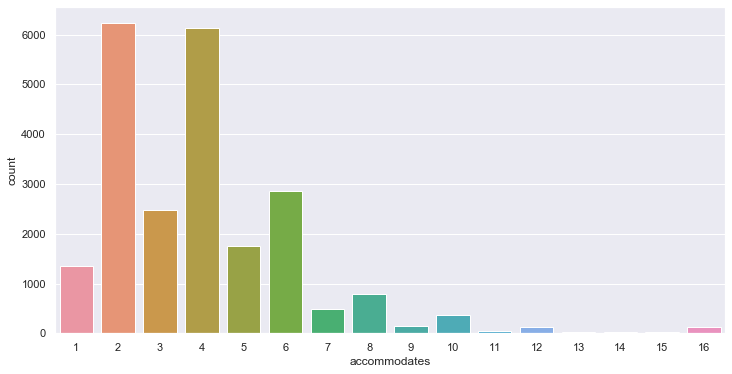

In [69]:
# plot das acomodações.
plt.figure(figsize=(12,6))
sns.countplot(x='accommodates', data=dados)
plt.show()

O gráfico em barras de 'accommodates' deixa claro que há picos nas contagem dos números pares, o que é natural, uma vez que as pessoas priorizam se hospedar em pares que sozinhas. Não apenas isso, os picos entre 2 e 4 acomodados são bem próximos, onde o percentual de acomodações para duas pessoas é de 27.18% e o com quatro de 26.7%. Já as acomodações que apresentaram menor percentual foram as seguintes: quinze (0.16%), catorze(0.14%) e treze (0.09%).

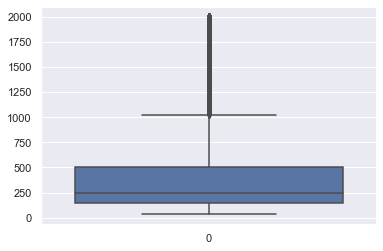

In [70]:
sns.boxplot(data=dados['price'])
plt.show()

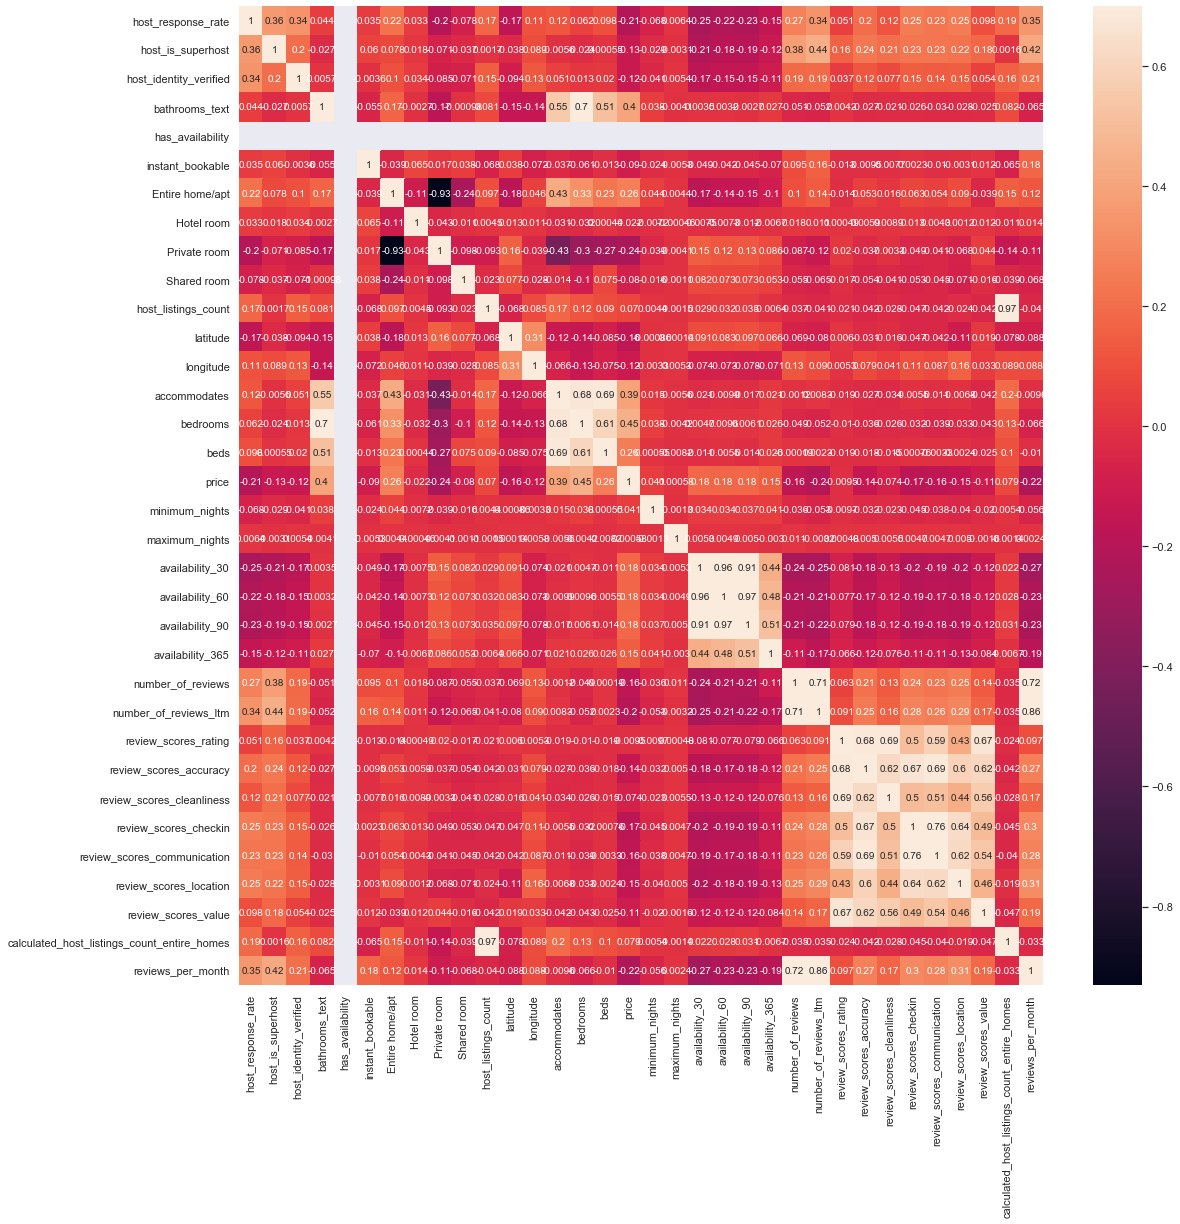

In [71]:
plt.figure(figsize=(18,18))
sns.heatmap(dados.corr(),vmax=.7,cbar=True,annot=True)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


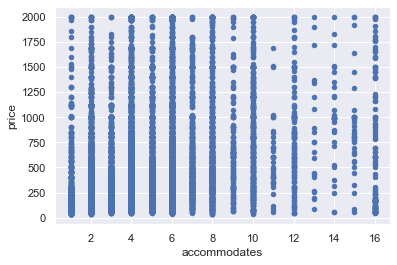

In [72]:
# gráfico de acomodação x preço
var = 'accommodates'
data = pd.concat([dados['price'], dados[var]], axis=1)
data.plot.scatter(x=var, y='price')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


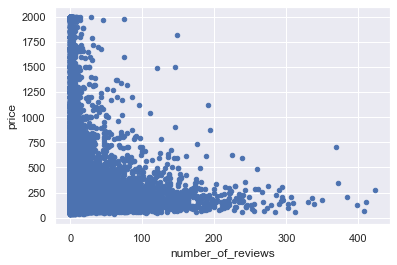

In [73]:
# número de review x preço
var = 'number_of_reviews'
data = pd.concat([dados['price'], dados[var]], axis=1)
data.plot.scatter(x=var, y='price')

O gráfico de dispersão entre preço e número de avaliações apresenta as seguintes informações:
Primeiro ponto: nenhum imóvel com preço acima de 800,00 possui mais de 200 avaliações.
Segundo: preço e número de avaliações parecem se relacionar de forma inversa. Quanto maior o preço, menor é o número de avaliações.

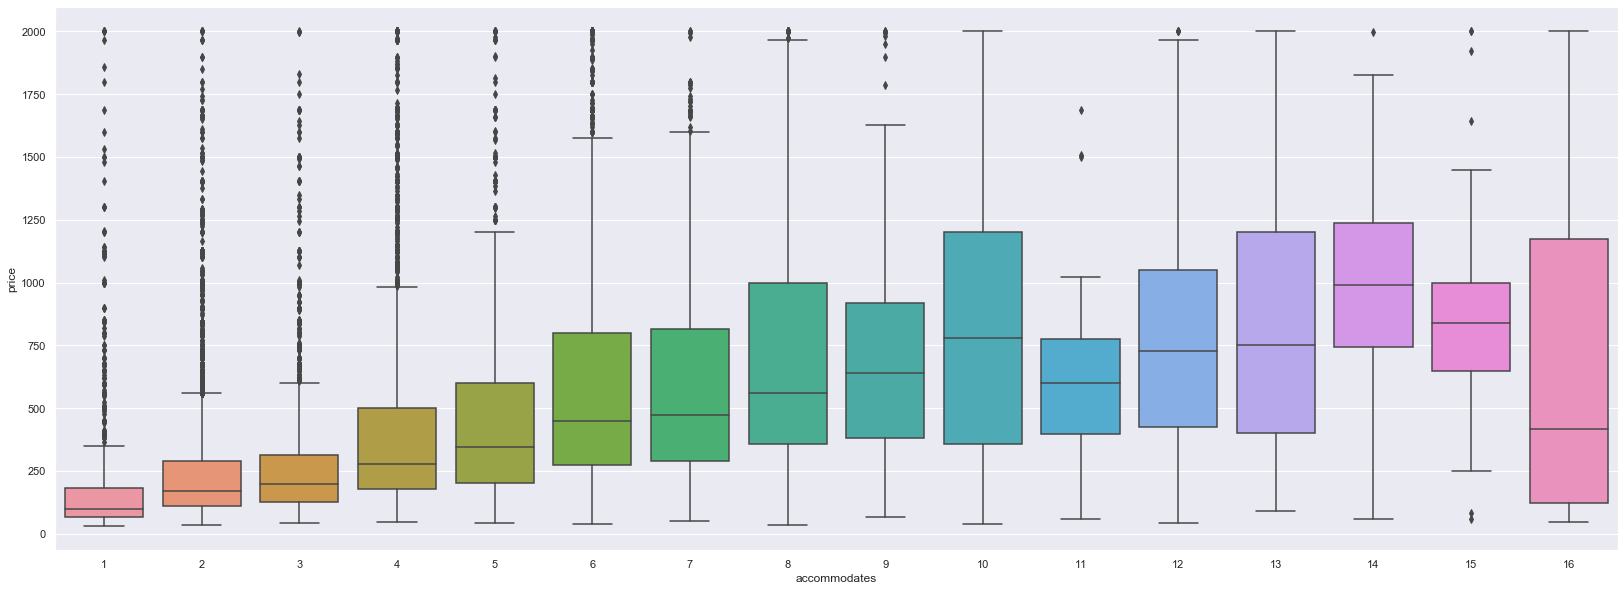

In [74]:
# acomodação x preço
var = 'accommodates'
data = pd.concat([dados['price'], dados[var]], axis=1)
f, ax = plt.subplots(figsize=(28, 10))
fig = sns.boxplot(x=var, y="price", data=data)

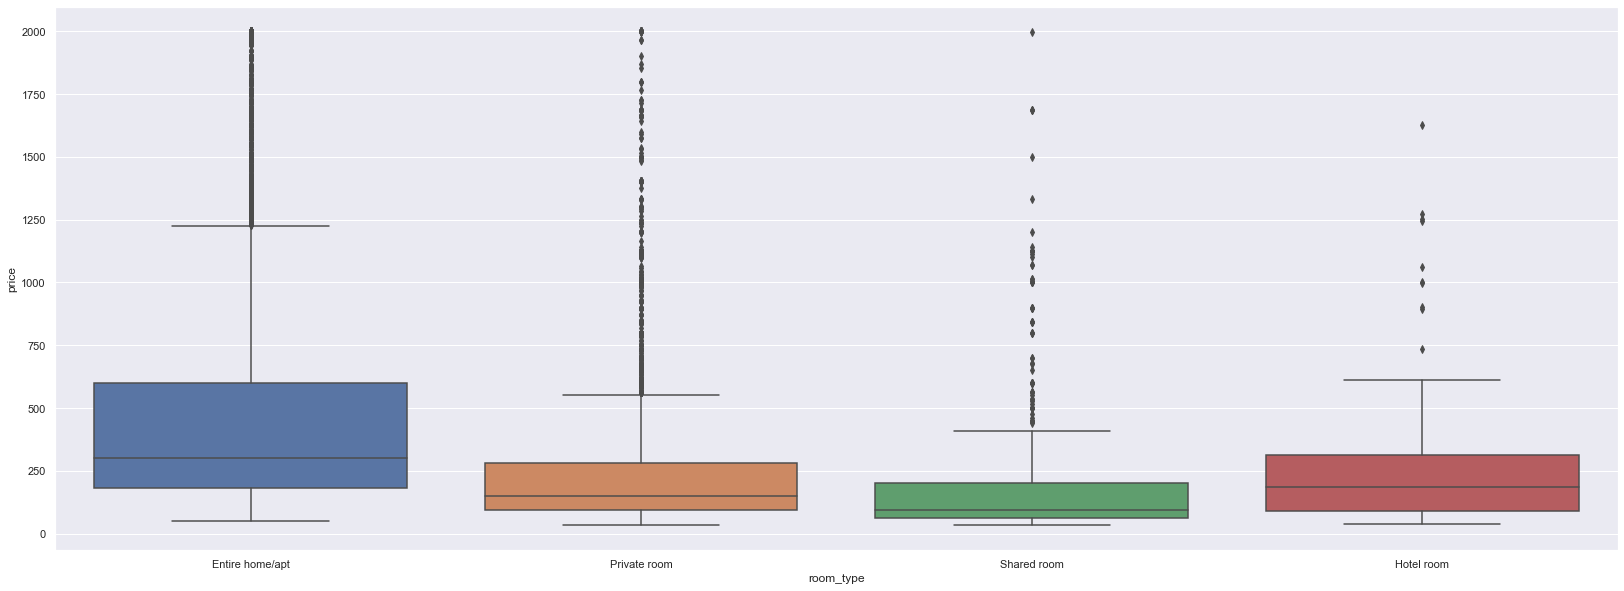

In [75]:
# acomodação x preço
var = 'room_type'
data = pd.concat([dados['price'], dados[var]], axis=1)
f, ax = plt.subplots(figsize=(28, 10))
fig = sns.boxplot(x=var, y="price", data=data)

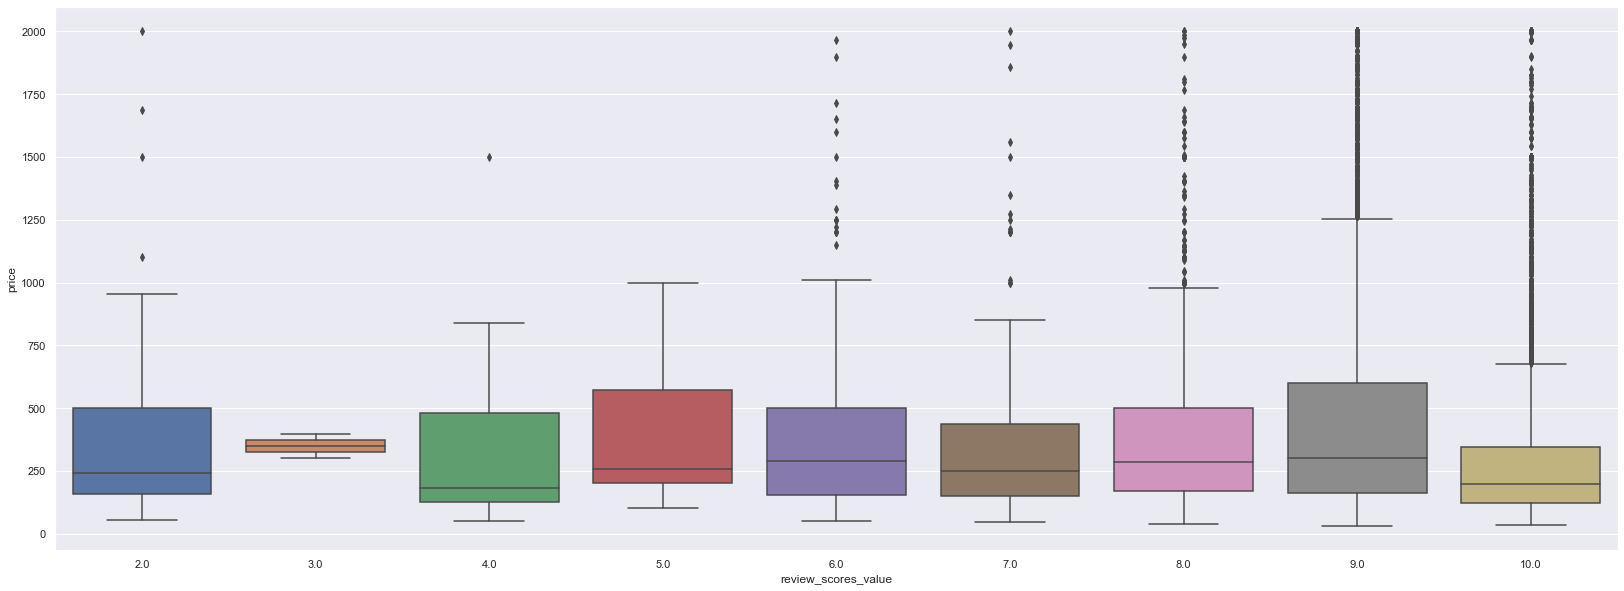

In [76]:
# acomodação x preço
var = 'review_scores_value'
data = pd.concat([dados['price'], dados[var]], axis=1)
f, ax = plt.subplots(figsize=(28, 10))
fig = sns.boxplot(x=var, y="price", data=data)

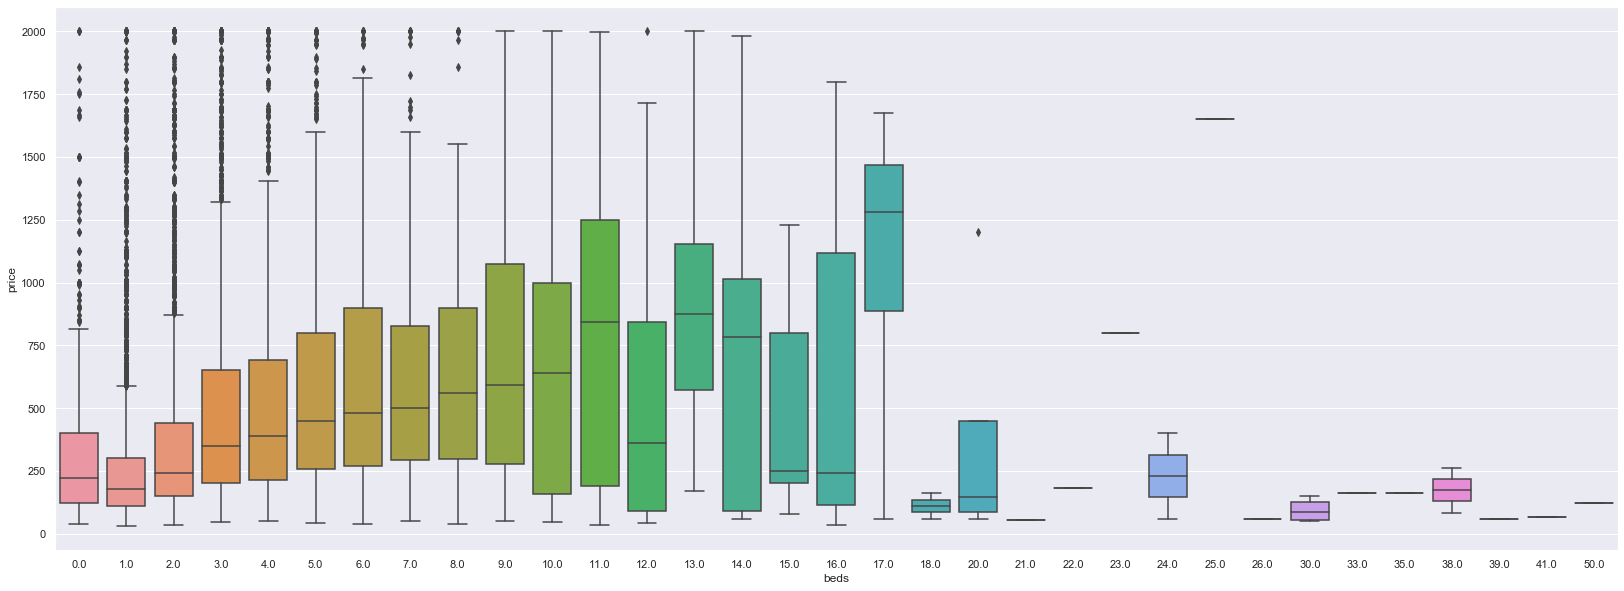

In [77]:
# acomodação x preço
var = 'beds'
data = pd.concat([dados['price'], dados[var]], axis=1)
f, ax = plt.subplots(figsize=(28, 10))
fig = sns.boxplot(x=var, y="price", data=data)

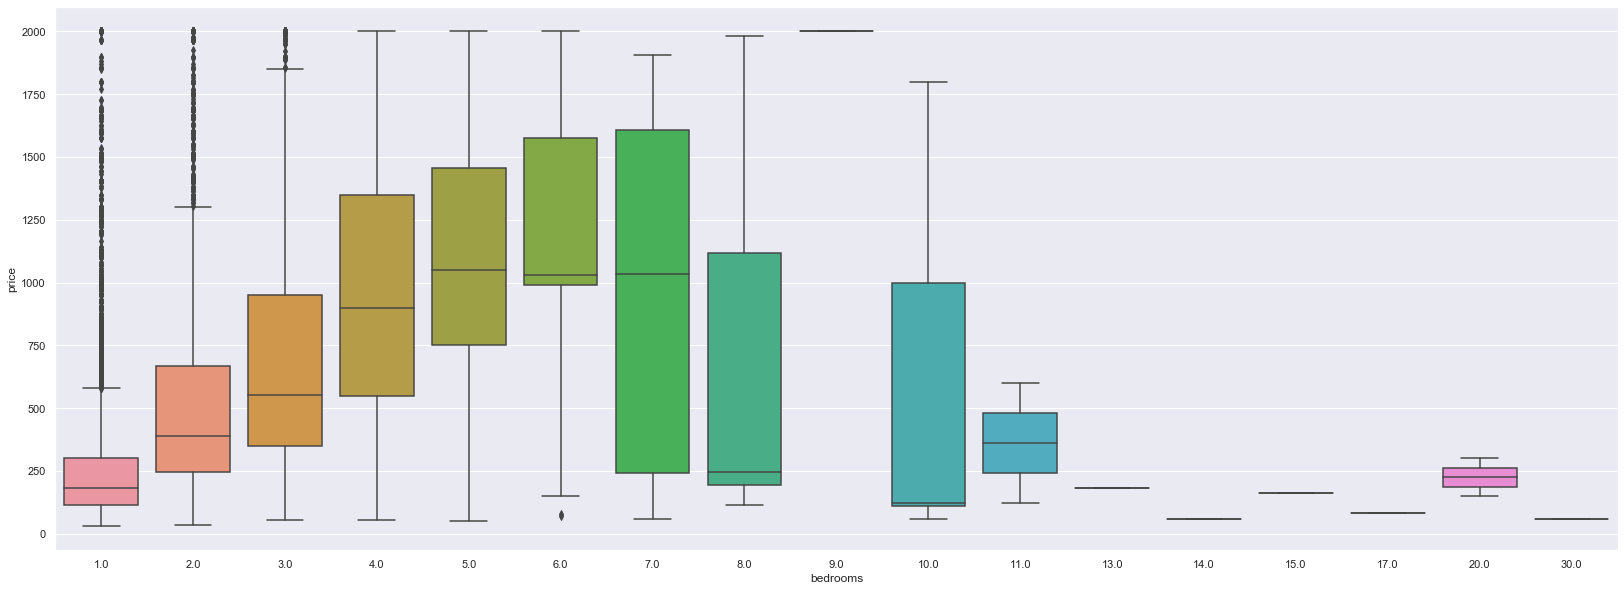

In [78]:
# acomodação x preço
var = 'bedrooms'
data = pd.concat([dados['price'], dados[var]], axis=1)
f, ax = plt.subplots(figsize=(28, 10))
fig = sns.boxplot(x=var, y="price", data=data)

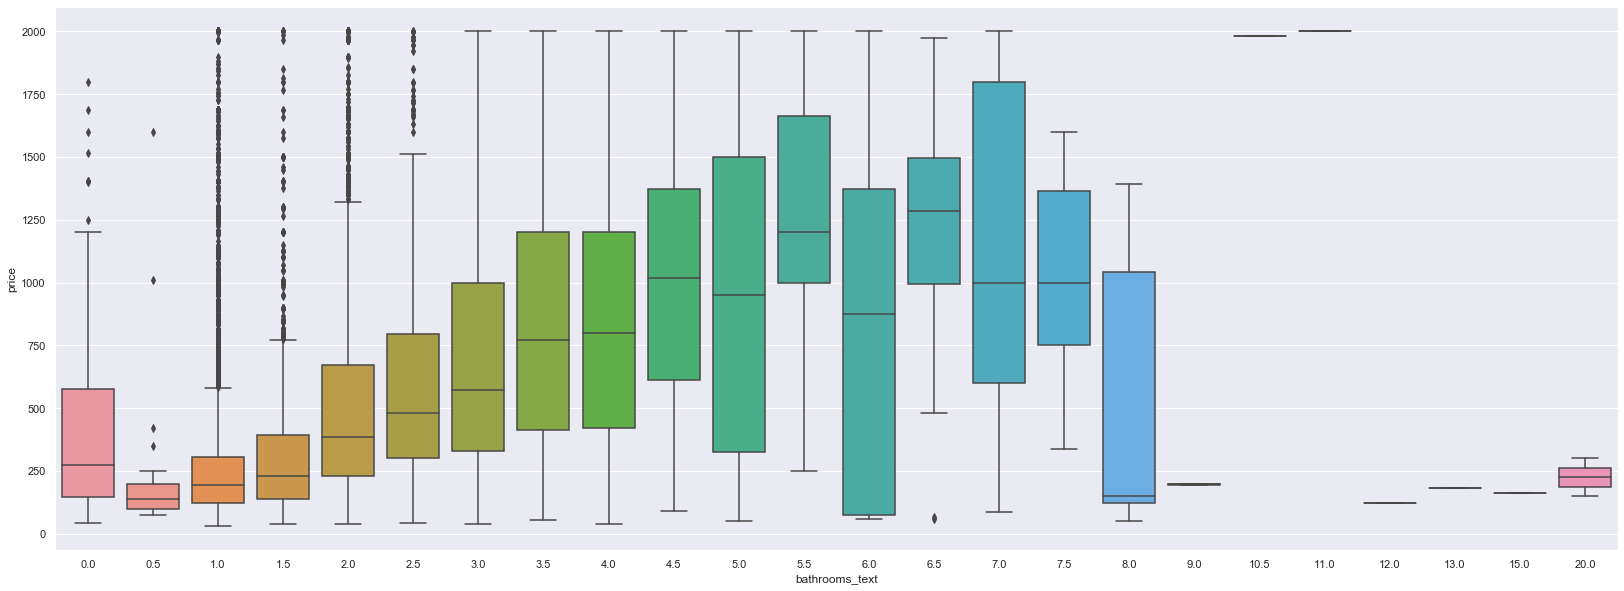

In [79]:
# acomodação x preço
var = 'bathrooms_text'
data = pd.concat([dados['price'], dados[var]], axis=1)
f, ax = plt.subplots(figsize=(28, 10))
fig = sns.boxplot(x=var, y="price", data=data)

count    22955.000000
mean         2.447963
std          1.965887
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         50.000000
Name: beds, dtype: float64


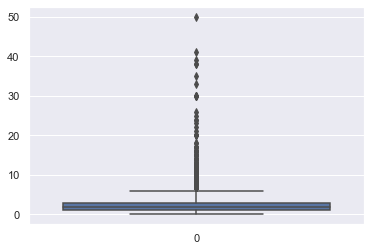

In [80]:
print(dados['beds'].describe())

sns.boxplot(data=dados['beds'])
plt.show()

count    22955.000000
mean         1.555739
std          0.884810
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         20.000000
Name: bathrooms_text, dtype: float64


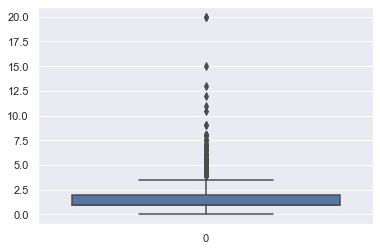

In [81]:
print(dados['bathrooms_text'].describe())

sns.boxplot(data=dados['bathrooms_text'])
plt.show()

count    22955.000000
mean         1.582226
std          0.921970
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         30.000000
Name: bedrooms, dtype: float64


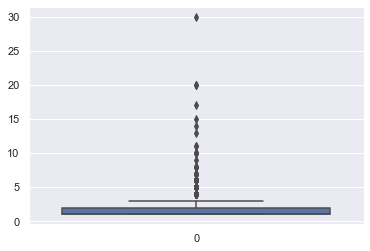

In [82]:
print(dados['bedrooms'].describe())

sns.boxplot(data=dados['bedrooms'])
plt.show()

count    22955.000000
mean         3.991157
std          2.333627
min          1.000000
25%          2.000000
50%          4.000000
75%          5.000000
max         16.000000
Name: accommodates, dtype: float64


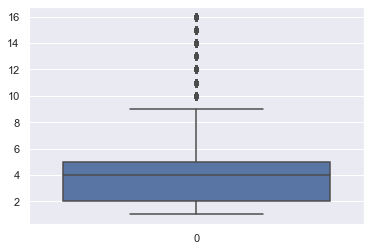

In [83]:
print(dados['accommodates'].describe())

sns.boxplot(data=dados['accommodates'])
plt.show()

count    22955.000000
mean        12.566195
std         29.880428
min          0.000000
25%          0.000000
50%          2.000000
75%         10.000000
max        423.000000
Name: number_of_reviews, dtype: float64


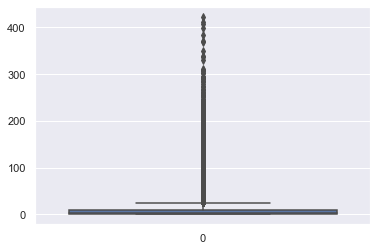

In [84]:
print(dados['number_of_reviews'].describe())

sns.boxplot(data=dados['number_of_reviews'])
plt.show()

Dado a presença de alguns outliers em variáveis que parecem promissoras, fiz algum tratamento nessas variáveis, que foram os seguintes:

Beds e bedrooms: os valores acima do percentil 95 foram substituídos pela moda - esses valores devem ser inteiros, por isso optei pela moda. Mediana seria uma boa opção também.

Accommodates, bathrooms_text e number_of_reviews: os valores acima do percentil 95 foram substituídos pela moda - esses valores devem ser inteiros, por isso optei pela mediana.

In [85]:
dados['beds'] = np.where(dados['beds'] > dados['beds'].quantile(0.95), dados['beds'].mode(), dados['beds'])
dados['bedrooms'] = np.where(dados['bedrooms'] > dados['bedrooms'].quantile(0.95), dados['bedrooms'].mode(), dados['bedrooms'])
dados['accommodates'] = np.where(dados['accommodates'] > dados['accommodates'].quantile(0.95), dados['accommodates'].median(), dados['accommodates'])
dados['bathrooms_text'] = np.where(dados['bathrooms_text'] > dados['bathrooms_text'].quantile(0.95), dados['bathrooms_text'].mode(), dados['bathrooms_text'])
dados['number_of_reviews'] = np.where(dados['number_of_reviews'] > dados['number_of_reviews'].quantile(0.95), dados['number_of_reviews'].median(), dados['number_of_reviews'])

count    22955.000000
mean         2.199564
std          1.350728
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: beds, dtype: float64


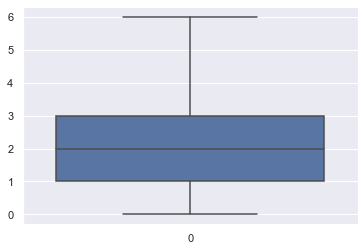

In [86]:
print(dados['beds'].describe())

sns.boxplot(data=dados['beds'])
plt.show()

count    22955.000000
mean         1.422479
std          0.619887
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: bathrooms_text, dtype: float64


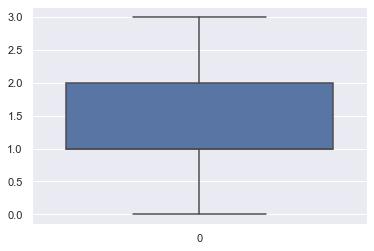

In [87]:
print(dados['bathrooms_text'].describe())

sns.boxplot(data=dados['bathrooms_text'])
plt.show()

count    22955.000000
mean         1.472359
std          0.689394
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: bedrooms, dtype: float64


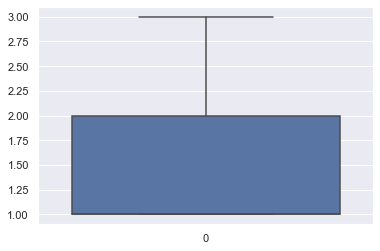

In [88]:
print(dados['bedrooms'].describe())

sns.boxplot(data=dados['bedrooms'])
plt.show()

count    22955.000000
mean         3.697887
std          1.714784
min          1.000000
25%          2.000000
50%          4.000000
75%          5.000000
max          8.000000
Name: accommodates, dtype: float64


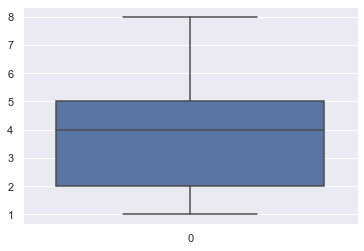

In [89]:
print(dados['accommodates'].describe())

sns.boxplot(data=dados['accommodates'])
plt.show()

count    22955.000000
mean         6.693008
std         12.103705
min          0.000000
25%          0.000000
50%          2.000000
75%          7.000000
max         66.000000
Name: number_of_reviews, dtype: float64


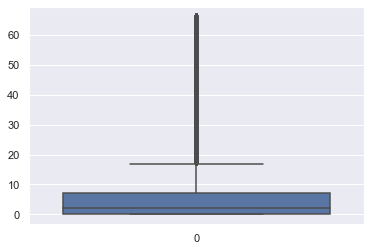

In [90]:
print(dados['number_of_reviews'].describe())

sns.boxplot(data=dados['number_of_reviews'])
plt.show()

Como é possível verificar, tirando number_of_reviews, todas as variáveis deixaram de ter outliers e melhoraram o comportamento do box-plot.

In [91]:
"""
def agrupando_numeros_de_reviews(reviews):
    if reviews == 0:
        return 'Nenhum'
    elif 1 <= reviews and reviews < 10:
        return 'Pouco'
    elif 10 <= reviews and reviews < 30:
        return 'Mediano'
    else:
        return 'Expressivo'
"""

"\ndef agrupando_numeros_de_reviews(reviews):\n    if reviews == 0:\n        return 'Nenhum'\n    elif 1 <= reviews and reviews < 10:\n        return 'Pouco'\n    elif 10 <= reviews and reviews < 30:\n        return 'Mediano'\n    else:\n        return 'Expressivo'\n"

In [92]:
# dados['number_of_reviews'] = dados['number_of_reviews'].apply(agrupando_numeros_de_reviews)

In [93]:
# dados['number_of_reviews'].value_counts()

In [94]:
# plot do tipo de quarto.
#sns.countplot(x='number_of_reviews', data=dados)
#plt.show()

In [95]:
"""zona_sul = sum(dados['regiao'] == 'Zona Sul')
barra_jpa = sum(dados['regiao'] == 'Barra/Jpa')
outros_bairros = sum(dados['regiao'] == 'Outros')
soma = dados['regiao'].count()

print(f"O percentual de bairros da zona sul é de {np.round ((zona_sul/soma) * 100, 2)}%.")
print(f"O percentual de bairros da barra e jacarepaguá é de {np.round ((barra_jpa/soma) * 100, 2)}%.")
print(f"O percentual dos demais bairros é de {np.round ((outros_bairros/soma) * 100, 2)}%.")
"""

'zona_sul = sum(dados[\'regiao\'] == \'Zona Sul\')\nbarra_jpa = sum(dados[\'regiao\'] == \'Barra/Jpa\')\noutros_bairros = sum(dados[\'regiao\'] == \'Outros\')\nsoma = dados[\'regiao\'].count()\n\nprint(f"O percentual de bairros da zona sul é de {np.round ((zona_sul/soma) * 100, 2)}%.")\nprint(f"O percentual de bairros da barra e jacarepaguá é de {np.round ((barra_jpa/soma) * 100, 2)}%.")\nprint(f"O percentual dos demais bairros é de {np.round ((outros_bairros/soma) * 100, 2)}%.")\n'

In [96]:
#sns.countplot(x='regiao', data=dados)
#plt.show()

A análise do agrupamento dos bairros mostra que mais da metade dos bairros listados estão na zona sul, com cerca de deproximadamente 51.15%. A segunda colocação ficou com os demais bairros, com percentual de 27.07% e por fim, Barra e Jararepaguá com 21.77%.

# Fazendo o cluster pela latitude e longitude.

In [97]:
# Variable with the Longitude and Latitude
lat_long=dados.loc[:,['latitude','longitude']]
lat_long.head(10)

,latitude,longitude
0,-22.96592,-43.17896
1,-22.98467,-43.19611
2,-22.97712,-43.19045
3,-22.98816,-43.19359
4,-22.98127,-43.19046
5,-22.97962,-43.19230
6,-22.98599,-43.20299
7,-22.98414,-43.19450
8,-22.96574,-43.17514
9,-22.97910,-43.19008


In [98]:
"""kmeans = KMeans(n_clusters=3)
lat_long["cluster_regiao"] = kmeans.fit_predict(lat_long)
lat_long["cluster_regiao"] = lat_long["cluster_regiao"].astype("category")
lat_long.head()"""

'kmeans = KMeans(n_clusters=3)\nlat_long["cluster_regiao"] = kmeans.fit_predict(lat_long)\nlat_long["cluster_regiao"] = lat_long["cluster_regiao"].astype("category")\nlat_long.head()'

In [99]:
"""sns.countplot(data=lat_long,  x="Cluster")
plt.xlabel('Cluster por região')
plt.ylabel('Contagem')
plt.tight_layout()"""

'sns.countplot(data=lat_long,  x="Cluster")\nplt.xlabel(\'Cluster por região\')\nplt.ylabel(\'Contagem\')\nplt.tight_layout()'

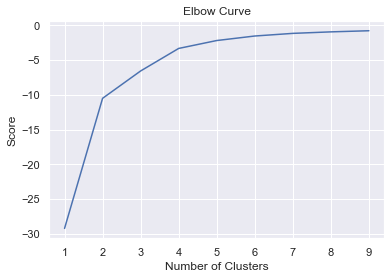

In [100]:
# calculando a quantidade de cluster por regiao:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = lat_long[['latitude']]
X_axis = lat_long[['longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


In [101]:
# fazendo o cluster
kmeans = KMeans(n_clusters = 4, init ='k-means++')
kmeans.fit(lat_long) # Compute k-means clustering.
lat_long['cluster_regiao'] = kmeans.fit_predict(lat_long)
#lat_long["cluster_regiao"] = lat_long["cluster_regiao"].astype("category")
#centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
#labels = kmeans.predict(lat_long) # Labels of each point
lat_long.head(10)

,latitude,longitude,cluster_regiao
0,-22.96592,-43.17896,1
1,-22.98467,-43.19611,1
2,-22.97712,-43.19045,1
3,-22.98816,-43.19359,1
4,-22.98127,-43.19046,1
5,-22.97962,-43.19230,1
6,-22.98599,-43.20299,1
7,-22.98414,-43.19450,1
8,-22.96574,-43.17514,1
9,-22.97910,-43.19008,1


In [102]:
dados_ = pd.concat([dados, lat_long['cluster_regiao']], axis=1, join='inner')

In [103]:
dados_.keys()

Index(['host_response_rate', 'host_is_superhost', 'host_identity_verified',
       'neighbourhood_cleansed', 'room_type', 'bathrooms_text',
       'has_availability', 'instant_bookable', 'Entire home/apt', 'Hotel room',
       'Private room', 'Shared room', 'host_listings_count', 'latitude',
       'longitude', 'accommodates', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count_entire_homes', 'reviews_per_month',
       'cluster_regiao'],
      dtype='object')

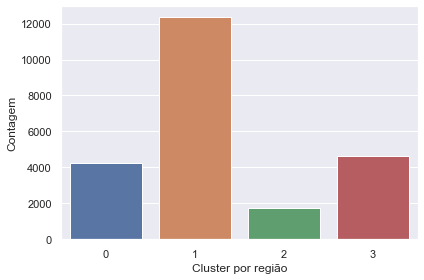

In [104]:
sns.countplot(data=dados_,  x="cluster_regiao")
plt.xlabel('Cluster por região')
plt.ylabel('Contagem')
plt.tight_layout()

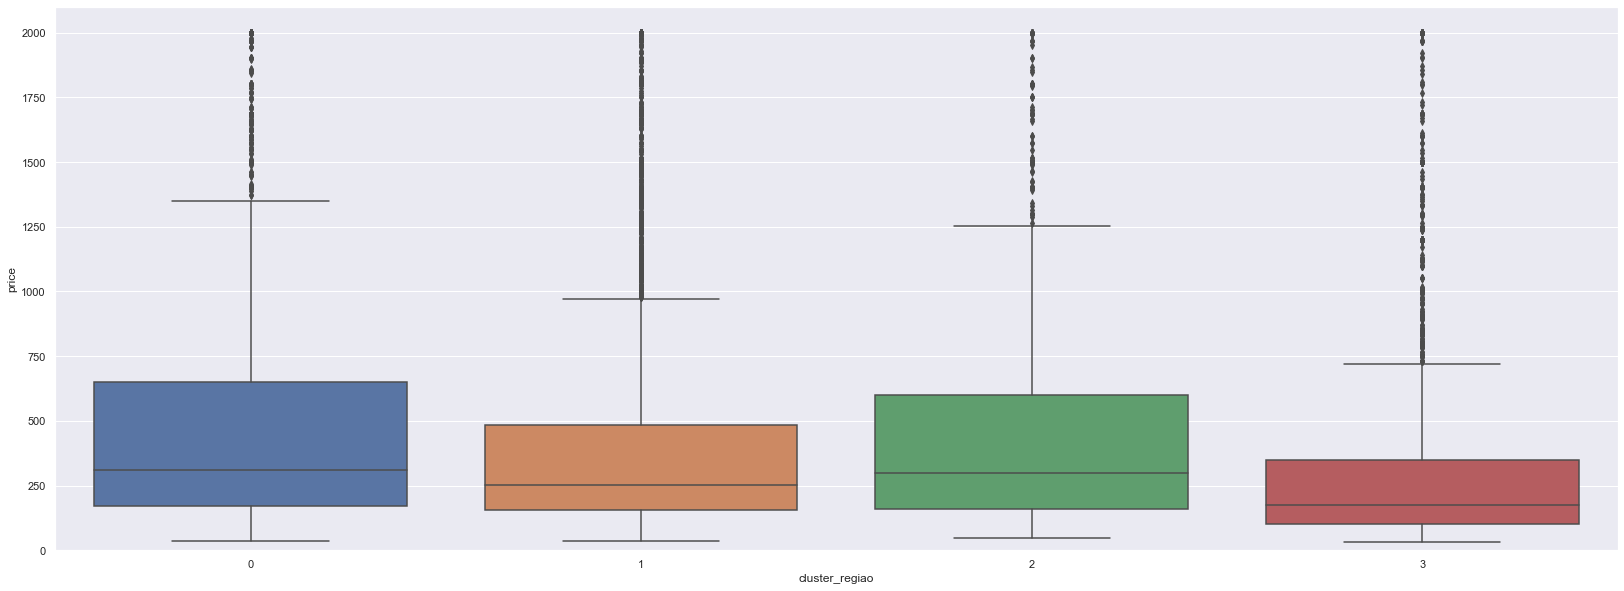

In [105]:
# acomodação x preço
var = 'cluster_regiao'
data = pd.concat([dados_['price'], dados_[var]], axis=1)
f, ax = plt.subplots(figsize=(28, 10))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=2100);

In [106]:
tipo_regiao = dados_['cluster_regiao'].value_counts(normalize=True) * 100
tipo_reg = list(tipo_regiao.keys())

In [107]:
# verificando o % por quartos:
for i in tipo_reg:
    print(f"O percentual da regiao {i} é de {np.round ((tipo_regiao[i]), 2)}%.")

O percentual da regiao 1 é de 53.75%.
O percentual da regiao 3 é de 20.24%.
O percentual da regiao 0 é de 18.54%.
O percentual da regiao 2 é de 7.48%.


Após agrupar os dados pela região, temos que a região 0 ficou com a percela de 53.73%, da região 3 com 20.24%, região 2 com 18.54% e, por fim, região 1 com 7.48%.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


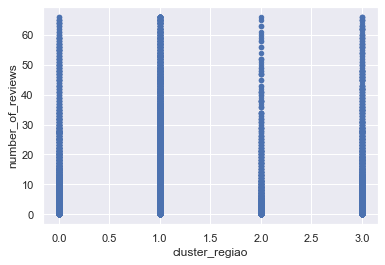

In [108]:
# número de review x preço
var = 'cluster_regiao'
data = pd.concat([dados_['number_of_reviews'], dados_[var]], axis=1)
data.plot.scatter(x=var, y='number_of_reviews')

In [109]:
# primeiro transforma a variável em categória, o que é preciso, depois gera uma nova coluna com as variáveis categóricas.
dados_['room_type'] = dados_['room_type'].astype('category')
dados_['room_type'] = dados_['room_type'].cat.codes

#dados_['number_of_reviews'] = dados_['number_of_reviews'].astype('category')
#dados_['number_of_reviews'] = dados_['number_of_reviews'].cat.codes

In [110]:
# fazendo ln dos preços:
dados_['price'] = np.log(dados_['price'])

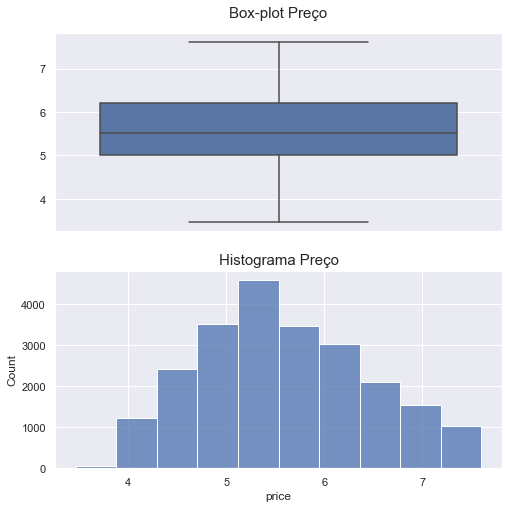

In [111]:
fig, ax = plt.subplots(2, 1, figsize=(8, 8))

g = sns.boxplot(data=dados_['price'], ax=ax[0])
g.set_title('Box-plot Preço', fontsize = 15, y =1.05)
g.set(xticklabels=[]) 
g.set(xlabel=None)
g.tick_params(bottom=False)

hist = sns.histplot(data=dados_, x="price", bins=10, ax=ax[1])
hist.set_title('Histograma Preço', fontsize = 15)

plt.show()

O preço após o logarítmo deixou de ter outluiers e o histograma passou a ter um comportamento bem melhor que antes, apesar de ainda não ser uma distribuição normal.

In [115]:
dados_classificacao = dados_.drop(['host_listings_count', 'latitude',
                       'longitude', 'neighbourhood_cleansed', 'Entire home/apt', 'Hotel room',
                       'Private room', 'Shared room'], axis = 1)

In [116]:
dados_regressao = dados_.drop(['host_listings_count', 'latitude',
                       'longitude', 'neighbourhood_cleansed', 'room_type'], axis = 1)

In [114]:
#dados_k.keys()

In [ ]:
#dados_r = dados_k.drop(['Barra/Jpa', 'Outros', 'Zona Sul', 'host_listings_count', 'latitude',
#                       'longitude', 'neighbourhood_cleansed', 'room_type', 'regiao', 'room_type_cat'], axis = 1)

In [ ]:
#dados_p = dados_k.drop(['host_listings_count', 'latitude', 'room_type_cat',
#                       'longitude', 'neighbourhood_cleansed', 'room_type', 'regiao', 'cluster_regiao'], axis = 1)

In [ ]:
#dados_t = dados_k.drop(['Barra/Jpa', 'Outros', 'Zona Sul', 'host_listings_count', 'latitude',
#                       'longitude', 'neighbourhood_cleansed', 'room_type', 'regiao', 'Entire home/apt', 'Hotel room',
#                       'Private room', 'Shared room'], axis = 1)

In [ ]:
#dados_z = dados_k.drop(['host_listings_count', 'latitude', 'cluster_regiao',
#                       'longitude', 'neighbourhood_cleansed', 'room_type', 'regiao', 'Entire home/apt', 'Hotel room',
#                       'Private room', 'Shared room'], axis = 1)

# Parte II: Modelagem

In [ ]:
correlacao = dados_regressao.corr()
target = 'price'
corr = correlacao.loc[((correlacao[target] < 0.9) & (correlacao[target] > 0.15)) | ((correlacao[target] > - 0.9) & (correlacao[target] < - 0.15))]
manter = list(corr.index)

In [ ]:
manter

In [ ]:
X = dados_regressao[manter]

In [ ]:
X

In [ ]:
y = dados_regressao[target]

In [ ]:
# separando os dados em treino e teste (30% para teste)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state= 0)

In [ ]:
alphas = [0.000001, 0.00001, 0.0001, 0.005, 0.001, 0.05, 0.01, 0.5, 0.1, 1]

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
# função que calcula o erro percentual absoluto
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape

Fazendo cálculos dos modelos sem validação cruzada:

In [ ]:
for a in alphas:
    model = Ridge(alpha=a, normalize=True).fit(X_train, y_train) 
    score = model.score(X_train, y_train)
    pred_y = model.predict(X_test)
    mse = mean_squared_error(y_test, pred_y) 
    print(f"Alpha:{a:.6f}, R2:{score:.3f}, MSE:{mse:.4f}, RMSE:{np.sqrt(mse):.4f}")

In [ ]:
for a in alphas:
    model = Lasso(alpha=a, normalize = True).fit((X_train), y_train)
    score = model.score(X_train, y_train)
    pred_y = model.predict(X_test)
    mse = mean_squared_error(y_test, pred_y) 
    print(f"Alpha:{a:.6f}, R2:{score:.3f}, MSE:{mse:.4f}, RMSE:{np.sqrt(mse):.4f}")

In [ ]:
for a in alphas:
    model = ElasticNet(alpha=a, normalize = True).fit((X_train), y_train)
    score = model.score(X_train, y_train)
    pred_y = model.predict(X_test)
    mse = mean_squared_error(y_test, pred_y) 
    print(f"Alpha:{a:.6f}, R2:{score:.3f}, MSE:{mse:.4f}, RMSE:{np.sqrt(mse):.4f}")

Com validação cruzada:

In [ ]:
# Ridge com validação cruzada:
ridge_cv=RidgeCV(alphas = alphas, cv = 10, normalize = True)
ridge_mod = ridge_cv.fit(X_train, y_train)


ypred = ridge_mod.predict(X_test)
score = ridge_mod.score(X_test, y_test)
score = r2_score(y_test,ypred)*100
mse = mean_squared_error(y_test,ypred)
mape = mean_absolute_percentage_error(y_test,ypred)


predictors = X_train.columns
coef = pd.Series(ridge_mod.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Coeficientes')

print(f"O alpha selecionado foi: {ridge_mod.alpha_:.6f}")
print(f"O R2 do modelo foi de {score:.4f}, o MSE foi {mse:.4f} e a raiz quadrada do MSE {(np.sqrt(mse)):.4f}")
print(f"A porcentagem média do erro absoluto foi de: {mape:.4f}%")
print(" ")
print(pd.Series(ridge_mod.coef_, index = X.columns))

In [ ]:
# lasso com validação cruzada:
lasso_cv = LassoCV(alphas = alphas, cv = 10, normalize = True)
lasso_mod = lasso_cv.fit(X_train, y_train)

ypred = lasso_mod.predict(X_test)
score = lasso_mod.score(X_test, y_test)
score = r2_score(y_test,ypred)*100
mse = mean_squared_error(y_test,ypred)
mape = mean_absolute_percentage_error(y_test,ypred)

predictors = X_train.columns
coef = pd.Series(lasso_mod.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Coeficientes')

print(f"O alpha selecionado foi: {lasso_mod.alpha_:.6f}")
print(f"O R2 do modelo foi de {score:.4f}, o MSE foi {mse:.4f} e a raiz quadrada do MSE {(np.sqrt(mse)):.4f}")
print(f"A porcentagem média do erro absoluto foi de: {mape:.4f}%")
print(" ")
print(pd.Series(lasso_mod.coef_, index = X.columns))

In [ ]:
# elastic com validação cruzada:
elastic_cv = ElasticNetCV(alphas=alphas, cv=10, normalize = True)
elastic_cv_mod = elastic_cv.fit(X_train, y_train)


ypred = elastic_cv_mod.predict(X_test)
score = elastic_cv_mod.score(X_test, y_test)
score = r2_score(y_test,ypred)*100
mse = mean_squared_error(y_test,ypred)
mape = mean_absolute_percentage_error(y_test,ypred)

predictors = X_train.columns
coef = pd.Series(elastic_cv_mod.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Coeficientes')

print(f"O alpha selecionado foi: {elastic_cv_mod.alpha_:.6f}")
print(f"O R2 do modelo foi de {score:.4f}, o MSE foi {mse:.4f} e a raiz quadrada do MSE {(np.sqrt(mse)):.4f}")
print(f"A porcentagem média do erro absoluto foi de: {mape:.4f}%")
print(" ")
print(pd.Series(elastic_cv_mod.coef_, index = X.columns))

Ponto interessantes:
- Apesar do ElasticNet, Lasso e Ridge não apresentarem os melhores resultador, eles fornecem informações em relação aos coeficientes. Em todos eles, o coeficiente referente ao Tipo_Quarto_Entire home/apt apresentou maior impacto positivo. O coeficiente de bedrooms também apresentou forte variação positiva em relação ao preço em todos os estimadores.
- Já o coeficiente referente ao Tipo_Quarto_Shared room mostrou impactar de forma negativa esses três estimadores. host_response_rate também afetou de forma bem negativa todos os estimadores.
- Um coeficiente chama atenção em especial: barra_jpa. Em todos estimadores, esse coeficiente teve um efeito positivo e entre os bairros, foi o que apresentou maior impacto no preço quando analisado os bairros.

In [ ]:
regrRM2 = RandomForestRegressor(n_estimators=200, max_depth = 50, min_samples_split = 5,min_samples_leaf =4)
regrRM2.fit(X_train, y_train)
rfr = regrRM2.fit(X_train, y_train)

ypred=regrRM2.predict(X_test)

mse = mean_squared_error(y_test,ypred)
mape = mean_absolute_percentage_error(y_test,ypred)
score = r2_score(y_test,ypred)*100

print(f"O R2 do modelo foi de {score:.4f}, o MSE foi {mse:.4f} e a raiz quadrada do MSE {(np.sqrt(mse)):.4f}")
print(f"A porcentagem média do erro absoluto foi de: {mape:.4f}%")

In [ ]:
clf = GradientBoostingRegressor(learning_rate = 0.2, max_depth =6, random_state = 42) #check the Gridsearch
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

mse = mean_squared_error(y_test,ypred)
mape = mean_absolute_percentage_error(y_test,ypred)
score = r2_score(y_test,ypred)*100

print(f"O R2 do modelo foi de {score:.4f}, o MSE foi {mse:.4f} e a raiz quadrada do MSE {(np.sqrt(mse)):.4f}")
print(f"A porcentagem média do erro absoluto foi de: {mape:.4f}%")

O modelo selecionado seria o do Gradient Boosting por dois motivos:
- apresentou maior R2: 56.58.
- teve menor porcentagem do erro absoluto: 7.77%

In [ ]:
parameters_clf = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": np.linspace(0.1, 0.5, 1, 3),
    "min_samples_leaf": np.linspace(0.1, 0.5, 1, 3),
    "max_depth":[2, 5, 10]
    }

In [ ]:
metricas = ['explained_variance', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'r2']

In [ ]:
clf = GradientBoostingRegressor()

In [ ]:
clf_grid = GridSearchCV(clf, parameters_clf, scoring=metricas, verbose=True, refit='neg_mean_squared_error', return_train_score=False, cv = 5, n_jobs = -1)

In [ ]:
clf_grid.fit(X_train, y_train)

In [ ]:
clf_best = clf_grid.best_estimator_

In [ ]:
clf_best

In [ ]:
ss = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
outcomes_r2 = []
outcomes_mape = []

    
fold = 0
for train_index, test_index in ss.split(X):
    fold += 1
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    clf_best.fit(X_train, y_train)
    ypred = clf_best.predict(X_test)
    
    mape = np.round(mean_absolute_percentage_error(y_test,ypred), 2)
    score = np.round(r2_score(y_test,ypred)*100, 2)
    
    outcomes_mape.append(mape)
    outcomes_r2.append(score)
    
    print(f"Fold {fold} MAPE: {mape}%, R2: {score}")     
mean_mape = np.round(np.mean(outcomes_mape), 2)
mean_r2 = np.round(np.mean(outcomes_r2), 2)
print(f"\nMean MAPE: {mean_mape}%")
print(f"\nMean R2: {mean_r2}")

In [ ]:
y_test

In [ ]:
ypred

# Estimando o tipo de quarto:

In [ ]:
dados_.keys()

In [ ]:
dados_.dtypes

In [ ]:
correlacao = dados_classificacao.corr()
target = 'room_type'
corr = correlacao.loc[((correlacao[target] < 0.9) & (correlacao[target] > 0.15)) | ((correlacao[target] > - 0.9) & (correlacao[target] < - 0.15))]
manter = list(corr.index)

In [ ]:
manter

In [ ]:
X

In [ ]:
#dados_classificacao['price'] = np.log(dados_classificacao['price'])

In [ ]:
X = dados_classificacao[manter]
y = (dados_classificacao[target])

In [ ]:
nr = NearMiss()
smt = SMOTE()

In [ ]:
X, y = smt.fit_resample(X, y)
#X, y = nr.fit_resample(X, y)

In [ ]:
ax = sns.countplot(x=y)

In [ ]:
models = ['Logistic Regression', 'SVC', 'K Neighbors', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=2)

In [ ]:
accuracy_list = []

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
accuracy_list.append(100*log_reg_acc)
print(Fore.GREEN + "Accuracy of Logistic Regression is : ", "{:.2f}%".format(100* log_reg_acc))

In [ ]:
conf = confusion_matrix(y_test, log_reg_pred)
conf

In [ ]:
# svc
sv_clf = SVC()
sv_clf.fit(X_train, y_train)
sv_clf_pred = sv_clf.predict(X_test)
sv_clf_acc = accuracy_score(y_test, sv_clf_pred)
accuracy_list.append(100* sv_clf_acc)
print(Fore.GREEN + "Accuracy of SVC is : ", "{:.2f}%".format(100* sv_clf_acc))

In [ ]:
conf = confusion_matrix(y_test, sv_clf_pred)

In [ ]:
kn_clf = KNeighborsClassifier(n_neighbors=6)
kn_clf.fit(X_train, y_train)
kn_pred = kn_clf.predict(X_test)
kn_acc = accuracy_score(y_test, kn_pred)
accuracy_list.append(100*kn_acc)
print(Fore.GREEN + "Accuracy of K Neighbors Classifier is : ", "{:.2f}%".format(100* kn_acc))

In [ ]:
conf = confusion_matrix(y_test, kn_pred)

In [ ]:
# Decision Tree Classifier

dt_clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0, criterion='entropy')
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
accuracy_list.append(100*dt_acc)
print(Fore.GREEN + "Accuracy of Decision Tree Classifier is : ", "{:.2f}%".format(100* dt_acc))

In [ ]:
conf = confusion_matrix(y_test, dt_pred)

In [ ]:
r_clf = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
r_clf.fit(X_train, y_train)
r_pred = r_clf.predict(X_test)
r_acc = accuracy_score(y_test, r_pred)
accuracy_list.append(100*r_acc)
print(Fore.GREEN + "Accuracy of Random Forest Classifier is : ", "{:.2f}%".format(100* r_acc))

In [ ]:
conf = confusion_matrix(y_test, r_pred)

In [ ]:
# GradientBoostingClassifier

gradientboost_clf = GradientBoostingClassifier(max_depth=2, random_state=1)
gradientboost_clf.fit(X_train,y_train)
gradientboost_pred = gradientboost_clf.predict(X_test)
gradientboost_acc = accuracy_score(y_test, gradientboost_pred)
accuracy_list.append(100*gradientboost_acc)
print(Fore.GREEN + "Accuracy of Gradient Boosting is : ", "{:.2f}%".format(100* gradientboost_acc))

In [ ]:
conf = confusion_matrix(y_test, gradientboost_pred)

In [ ]:
"""
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=models, y=accuracy_list, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()
"""

In [ ]:
parameters = {
    "learning_rate": [0.01, 0.025, 0.1],
    "min_samples_split": np.linspace(0.1, 0.5, 1, 2),
    "min_samples_leaf": np.linspace(0.1, 0.5, 1, 2),
    "max_depth":[2, 5, 10, 15]
    }

In [ ]:
gbc = GradientBoostingClassifier()

In [ ]:
gbc_grid = GridSearchCV(gbc, parameters, cv=5, scoring='accuracy', verbose=True, n_jobs=-1)

In [ ]:
gbc_grid.fit(X_train, y_train)

In [ ]:
gbc_best = gbc_grid.best_estimator_
gbc_best

In [ ]:
#X = dados_classificacao[manter]
#y = (dados_classificacao[target])

In [ ]:
#X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=2)

In [ ]:
kf = KFold(n_splits=10)
outcomes_acc = []
outcomes_prec = []
outcomes_rec = []
outcomes_f1 = []
    
fold = 0
for train_index, test_index in kf.split(X):

    fold += 1
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    
    gbc_best.fit(X_train, y_train)
    predictions = gbc_best.predict(X_test)
    
    print(classification_report(y_test, predictions))
    print(confusion_matrix(y_test, predictions))

"""
    accuracy = (np.round(accuracy_score(y_test, predictions)*100, 2))
    outcomes_acc.append(accuracy)
    
    precision = (np.round(precision_score(y_test, predictions, average='micro')*100, 2))
    outcomes_prec.append(precision)
    
    recall = (np.round(recall_score(y_test, predictions, average='micro')*100, 2))
    outcomes_rec.append(recall)
    
    f1 = (np.round(f1_score(y_test, predictions, average='micro')*100, 2))
    outcomes_f1.append(f1)
    
    #print(train_index, test_index)
    print(f"\nFold {fold} accuracy: {accuracy}%.")
    print(f"Fold {fold} precision: {precision}%.")
    print(f"Fold {fold} recall: {recall}%.")
    print(f"Fold {fold} F1: {f1}%.")

mean_outcome_ac = np.round(np.mean(outcomes_acc),2)
mean_outcome_pr = np.round(np.mean(outcomes_prec),2)
mean_outcome_re = np.round(np.mean(outcomes_rec),2)
mean_outcome_f1 = np.round(np.mean(outcomes_f1),2)

print(f"\nMean Accuracy: {mean_outcome_ac}%.")
print(f"Mean Precision: {mean_outcome_pr}%.")
print(f"Mean Recall: {mean_outcome_re}%.")
print(f"Mean F1: {mean_outcome_f1}%.")
"""

In [ ]:
ss = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
outcomes_acc = []
outcomes_prec = []
outcomes_rec = []
outcomes_f1 = []
    
fold = 0
for train_index, test_index in ss.split(X):

    fold += 1
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    
    gbc_best.fit(X_train, y_train)
    predictions = gbc_best.predict(X_test)
    
    print(classification_report(y_test, predictions))
    print(confusion_matrix(y_test, predictions))
    
"""
    accuracy = (np.round(accuracy_score(y_test, predictions)*100, 2))
    outcomes_acc.append(accuracy)
    
    precision = (np.round(precision_score(y_test, predictions, average='micro')*100, 2))
    outcomes_prec.append(precision)
    
    recall = (np.round(recall_score(y_test, predictions, average='micro')*100, 2))
    outcomes_rec.append(recall)
    
    f1 = (np.round(f1_score(y_test, predictions, average='micro')*100, 2))
    outcomes_f1.append(f1)
    
    #print(train_index, test_index)
    print(f"\nFold {fold} accuracy: {accuracy}%.")
    print(f"Fold {fold} precision: {precision}%.")
    print(f"Fold {fold} recall: {recall}%.")
    print(f"Fold {fold} F1: {f1}%.")

#mean_outcome_ac = np.round(np.mean(outcomes_acc),2)
#mean_outcome_pr = np.round(np.mean(outcomes_prec),2)
#mean_outcome_re = np.round(np.mean(outcomes_rec),2)
#mean_outcome_f1 = np.round(np.mean(outcomes_f1),2)

print(f"\nMean Accuracy: {mean_outcome_ac}%.")
print(f"Mean Precision: {mean_outcome_pr}%.")
print(f"Mean Recall: {mean_outcome_re}%.")
print(f"Mean F1: {mean_outcome_f1}%.")
"""

In [ ]:
parametros_rfc = {
    'n_estimators': [100, 300, 800],
    'max_depth': [5, 30],
    'min_samples_split': [1.0, 15, 100],
    'min_samples_leaf': [1, 5, 10] 
    }

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc_grid = GridSearchCV(rfc, parametros_rfc, cv=5, scoring='accuracy', verbose=True, n_jobs=-1)

In [ ]:
rfc_grid.fit(X_train, y_train)

In [ ]:
rfc_best = rfc_grid.best_estimator_
rfc_best

In [ ]:
ss = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
outcomes_acc = []
outcomes_prec = []
outcomes_rec = []
outcomes_f1 = []
    
fold = 0
for train_index, test_index in ss.split(X):

    fold += 1
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    
    rfc_best.fit(X_train, y_train)
    predictions = rfc_best.predict(X_test)
    
    print(classification_report(y_test, predictions))
    print(confusion_matrix(y_test, predictions))

In [ ]:
pip install -U imbalanced-learn

In [ ]:
!pip install imblearn

In [ ]:
gbc_best.fit(X_train, y_train)
predictions = gbc_best.predict(X_test)

In [ ]:
plot_confusion_matrix(gbc_best, X_test, y_test)  
plt.show()

In [ ]:
print(classification_report(y_test, predictions))

In [ ]:
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()

In [ ]:
X = iris.data
y = iris.target

In [ ]:
y